In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Crime_clean.csv')
df.head()

,UOR_DESC,CRIME_TYPE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,DIFF_TIME_MIN,YEAR,MONTH,DAY_RANGE
0,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,PART II,COMPLETED,6TH DIVISION,RESIDENCE / HOME,1100 BLOCK LORETTA ST ...,LOUISVILLE,40213.0,113.0,2014.0,7.0,PRENOON
1,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,PART II,COMPLETED,5TH DIVISION,HIGHWAY / ROAD / ALLEY,1500 BLOCK BARDSTOWN RD ...,LOUISVILLE,40205.0,6788.0,2014.0,11.0,PRENOON
2,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,PART II,COMPLETED,7TH DIVISION,HIGHWAY / ROAD / ALLEY,4100 BLOCK WILLOWVIEW BLVD ...,LOUISVILLE,40299.0,585.0,2014.0,6.0,AFTERNOON
3,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,PART II,COMPLETED,5TH DIVISION,RESIDENCE / HOME,6100 BLOCK DUTCHMANS LN ...,LOUISVILLE,40205.0,325.0,2014.0,1.0,AFTERNOON
4,"RECEIVING STOLEN PROPERTY U/$10,000",THEFT/LARCENY,PART II,COMPLETED,7TH DIVISION,RESIDENCE / HOME,@I65S TO OKOLONA EXIT ...,LOUISVILLE,40219.0,5599.0,2014.0,11.0,AFTERNOON


In [3]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

In [4]:
df = df.convert_dtypes()

In [5]:
year_drop = df[df.YEAR < 2014].index

In [6]:
df.drop(year_drop, axis=0, inplace=True)

In [7]:
cols = ["CRIME_TYPE", "UCR_HIERARCHY", "ATT_COMP", "LMPD_DIVISION", "YEAR", "MONTH","DAY_RANGE"]
for col in cols:
    df[col] = df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400151 entries, 0 to 403685
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   UOR_DESC       400151 non-null  string  
 1   CRIME_TYPE     400151 non-null  category
 2   UCR_HIERARCHY  400151 non-null  category
 3   ATT_COMP       400151 non-null  category
 4   LMPD_DIVISION  400151 non-null  category
 5   PREMISE_TYPE   400151 non-null  string  
 6   BLOCK_ADDRESS  400151 non-null  string  
 7   CITY           400151 non-null  string  
 8   ZIP_CODE       400151 non-null  Int64   
 9   DIFF_TIME_MIN  400151 non-null  Int64   
 10  YEAR           400151 non-null  category
 11  MONTH          400151 non-null  category
 12  DAY_RANGE      400151 non-null  category
dtypes: Int64(2), category(7), string(4)
memory usage: 24.8 MB


In [9]:
df.describe()

,ZIP_CODE,DIFF_TIME_MIN
count,400151.000000,4.001510e+05
mean,40221.072033,9.094382e+03
std,1440.217398,6.481047e+04
min,1413.000000,-1.432000e+03
25%,40209.000000,0.000000e+00
50%,40214.000000,4.500000e+01
75%,40219.000000,1.083000e+03
max,944091.000000,2.615900e+06


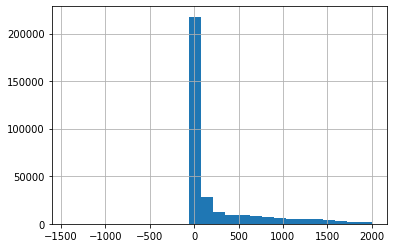

In [10]:
df[df.DIFF_TIME_MIN < 2000].DIFF_TIME_MIN.hist(bins=25)
plt.show()

In [11]:
df["DIFF_TIME_MIN_LOG"] = np.log10(df[df.DIFF_TIME_MIN > 0].DIFF_TIME_MIN)

<AxesSubplot:>

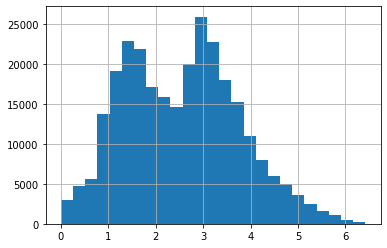

In [12]:
df.DIFF_TIME_MIN_LOG.hist(bins=25)

In [13]:
df.describe(include=['category', 'string'])

,UOR_DESC,CRIME_TYPE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,PREMISE_TYPE,BLOCK_ADDRESS,CITY,YEAR,MONTH,DAY_RANGE
count,400151,400151,400151,400151,400151,400151,400151,400151,400151,400151,400151
unique,746,16,3,3,9,49,27897,135,5,12,2
top,TBUT OR DISP SHOPLIFTING < $500,THEFT/LARCENY,PART II,COMPLETED,4TH DIVISION,RESIDENCE / HOME,4800 BLOCK OUTER LOOP ...,LOUISVILLE,2016,7,AFTERNOON
freq,22216,78043,227067,393004,69943,144239,3564,385093,83600,36169,232328


In [14]:
top_uor = df.UOR_DESC.value_counts().head(10).index

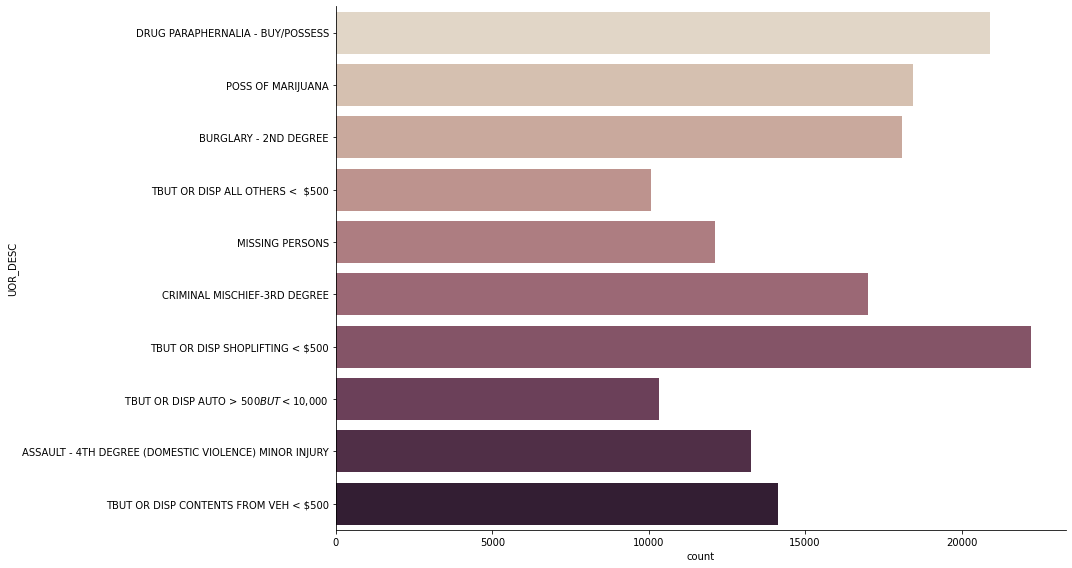

In [15]:
sns.catplot(data=df[df.UOR_DESC.isin(top_uor)], kind="count", palette="ch:.25", y="UOR_DESC", height=8, aspect=15/8)

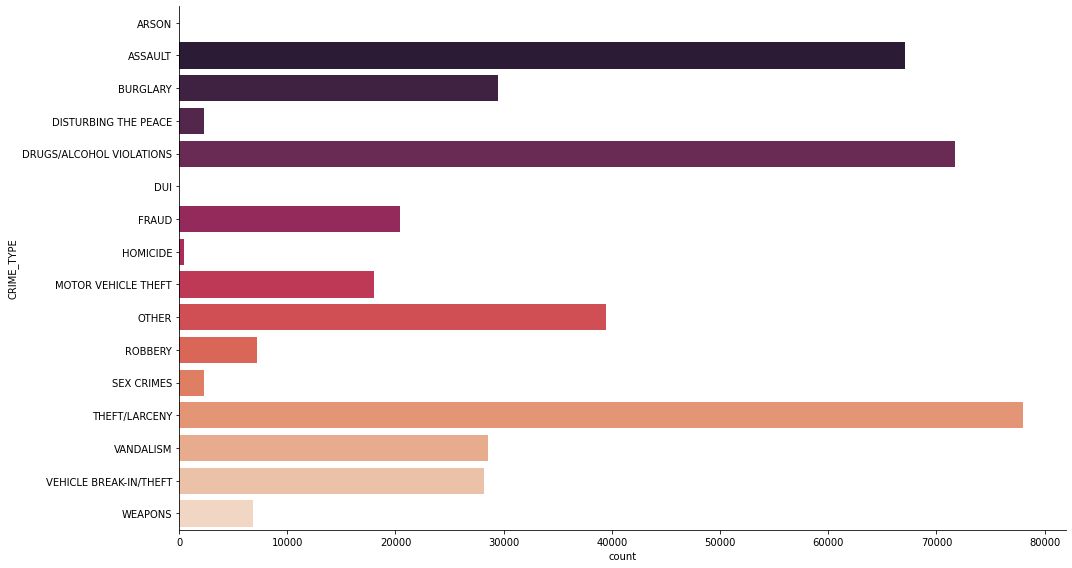

In [16]:
sns.catplot(data=df, kind="count", palette="rocket", y="CRIME_TYPE", height=8, aspect=15/8)

<AxesSubplot:ylabel='None'>

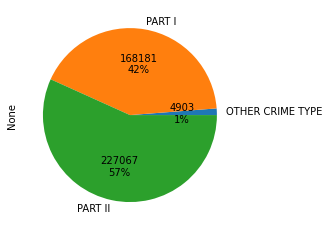

In [17]:
#sns.catplot(data=df, kind="count", palette="mako", y="UCR_HIERARCHY", height=6, aspect=10/6)
df.groupby("UCR_HIERARCHY").size().plot.pie(autopct=label_function)

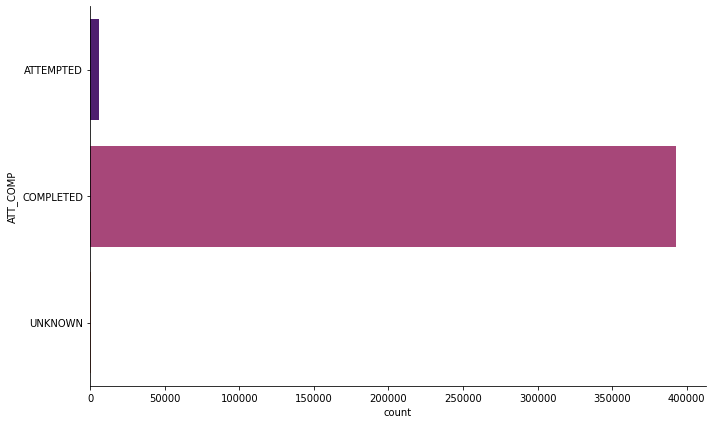

In [18]:
sns.catplot(data=df, kind="count", palette="magma", y="ATT_COMP", height=6, aspect=10/6)
#df.groupby("ATT_COMP").size().plot.pie(autopct=label_function)

In [19]:
df[df.ATT_COMP == "UNKNOWN"].shape


(862, 14)

In [20]:
df[df.ATT_COMP == "ATTEMPTED"].describe(include=['string', 'category']) #most of them are form PART I in UCR_HIERARCHY

,UOR_DESC,CRIME_TYPE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,PREMISE_TYPE,BLOCK_ADDRESS,CITY,YEAR,MONTH,DAY_RANGE
count,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285
unique,118,12,3,1,9,39,4166,47,5,12,2
top,TBUT OR DISP CONTENTS FROM VEH < $500,VEHICLE BREAK-IN/THEFT,PART I,ATTEMPTED,4TH DIVISION,RESIDENCE / HOME,4800 BLOCK OUTER LOOP ...,LOUISVILLE,2017,10,AFTERNOON
freq,1957,2121,5611,6285,1290,2469,33,6099,1461,610,3653


In [21]:
df[df.UCR_HIERARCHY == "PART I"].ATT_COMP.value_counts()

COMPLETED    162550
ATTEMPTED      5611
UNKNOWN          20
Name: ATT_COMP, dtype: int64

In [22]:
df[df.ATT_COMP == "UNKNOWN"].describe(include=['string', 'category']) #most of them are from PART II in LOUISVILLE

,UOR_DESC,CRIME_TYPE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,PREMISE_TYPE,BLOCK_ADDRESS,CITY,YEAR,MONTH,DAY_RANGE
count,862,862,862,862,862,862,862,862,862,862,862
unique,173,11,3,1,9,27,671,21,5,12,2
top,VIOLATION OF KENTUCKY EPO/DVO,DRUGS/ALCOHOL VIOLATIONS,PART II,UNKNOWN,1ST DIVISION,OTHER / UNKNOWN,2100 BLOCK STANDARD AVE ...,LOUISVILLE,2016,7,AFTERNOON
freq,158,318,812,862,173,326,7,813,257,116,519


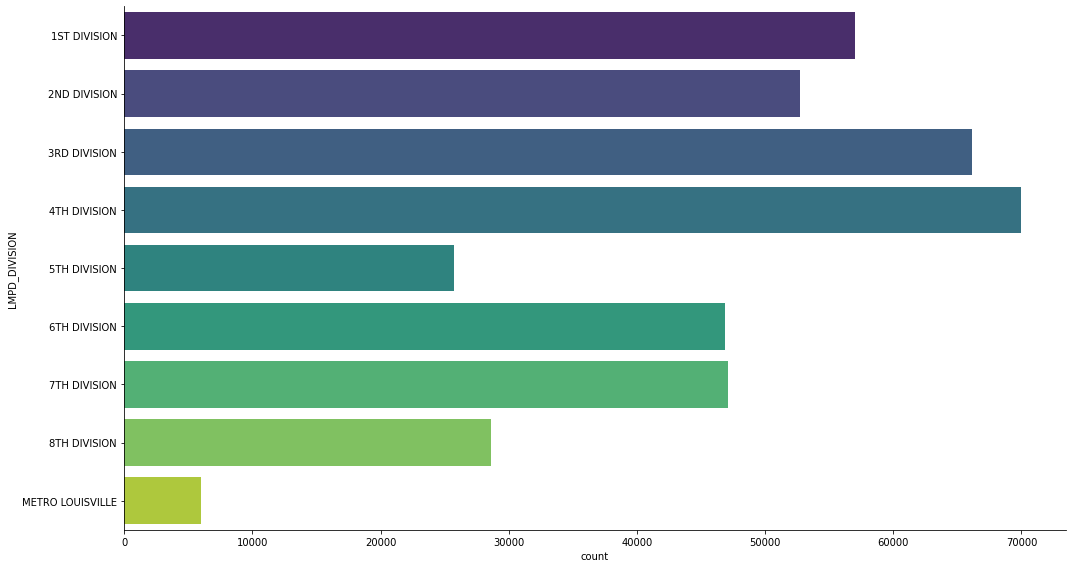

In [23]:
sns.catplot(data=df, kind="count", palette="viridis", y="LMPD_DIVISION", height=8, aspect=15/8)

In [24]:
top_addresses = df.BLOCK_ADDRESS.value_counts().head(10).index

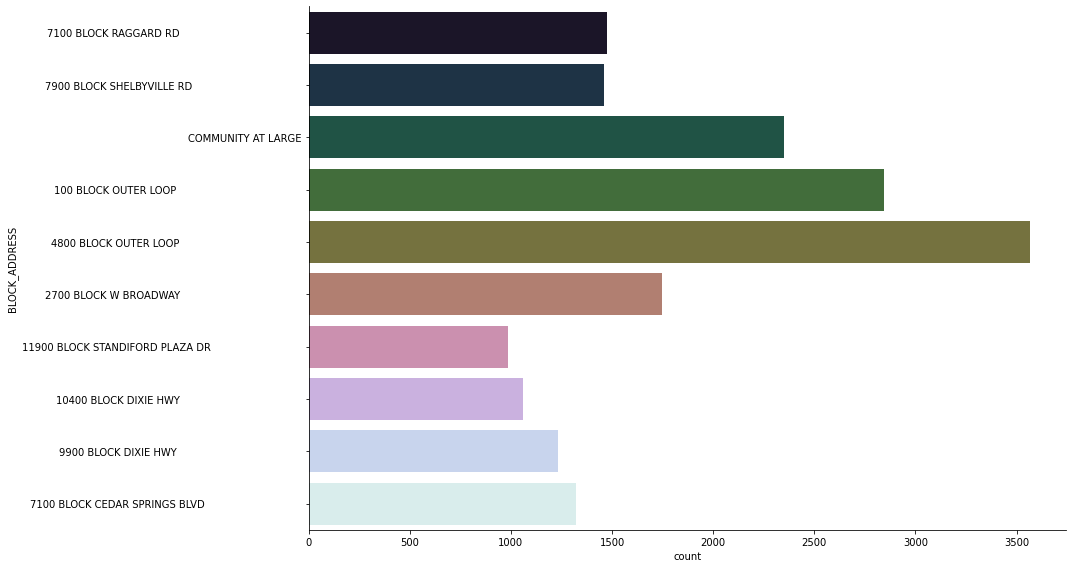

In [25]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], kind="count", palette="cubehelix", y="BLOCK_ADDRESS", height=8, aspect=15/8)

In [26]:
top_premise = df.PREMISE_TYPE.value_counts().head(10).index

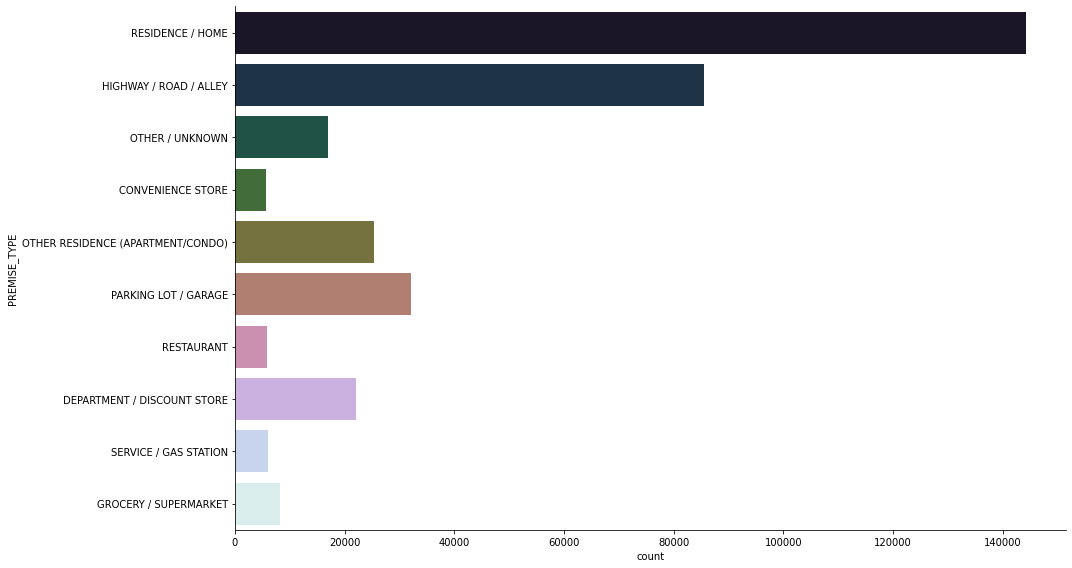

In [27]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], kind="count", palette="cubehelix", y="PREMISE_TYPE", height=8, aspect=15/8)

In [28]:
df[df.CITY != "LOUISVILLE"].describe(include=["category", "string"]) #Usually completed - (15176, 12)

,UOR_DESC,CRIME_TYPE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,PREMISE_TYPE,BLOCK_ADDRESS,CITY,YEAR,MONTH,DAY_RANGE
count,15058,15058,15058,15058,15058,15058,15058,15058,15058,15058,15058
unique,389,16,3,3,9,44,3546,134,5,12,2
top,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,PART II,COMPLETED,8TH DIVISION,RESIDENCE / HOME,1900 BLOCK S HURSTBOURNE PKY ...,MIDDLETOWN,2014,6,AFTERNOON
freq,1065,3499,9314,14823,7744,4978,470,2223,3743,2057,8780


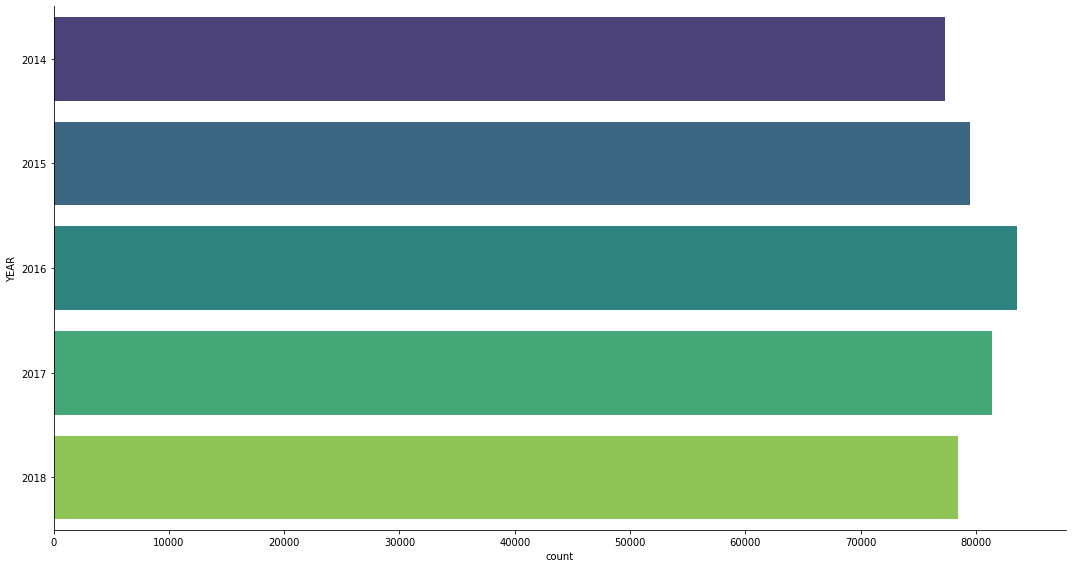

In [29]:
sns.catplot(data=df, kind="count", palette="viridis", y="YEAR", height=8, aspect=15/8)

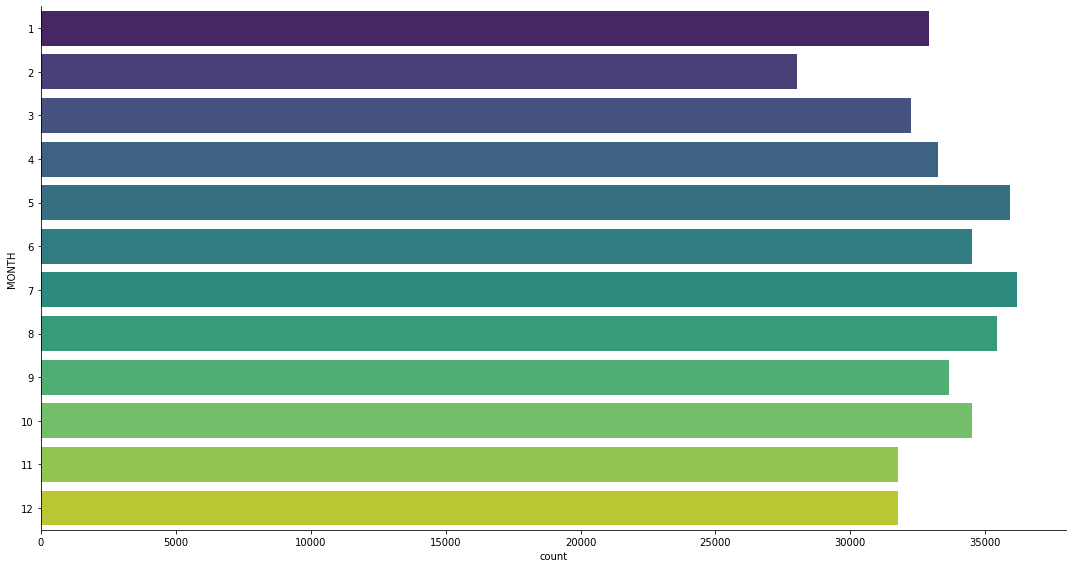

In [30]:
sns.catplot(data=df, kind="count", palette="viridis", y="MONTH", height=8, aspect=15/8)

<AxesSubplot:ylabel='None'>

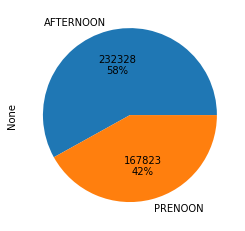

In [31]:
#sns.catplot(data=df, kind="count", palette="viridis", y="DAY_RANGE", height=6, aspect=10/6)
df.groupby("DAY_RANGE").size().plot.pie(autopct=label_function)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400151 entries, 0 to 403685
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   UOR_DESC           400151 non-null  string  
 1   CRIME_TYPE         400151 non-null  category
 2   UCR_HIERARCHY      400151 non-null  category
 3   ATT_COMP           400151 non-null  category
 4   LMPD_DIVISION      400151 non-null  category
 5   PREMISE_TYPE       400151 non-null  string  
 6   BLOCK_ADDRESS      400151 non-null  string  
 7   CITY               400151 non-null  string  
 8   ZIP_CODE           400151 non-null  Int64   
 9   DIFF_TIME_MIN      400151 non-null  Int64   
 10  YEAR               400151 non-null  category
 11  MONTH              400151 non-null  category
 12  DAY_RANGE          400151 non-null  category
 13  DIFF_TIME_MIN_LOG  279581 non-null  Float64 
dtypes: Float64(1), Int64(2), category(7), string(4)
memory usage: 36.3 MB


# Crime Type Vs. UCR Hierarchy

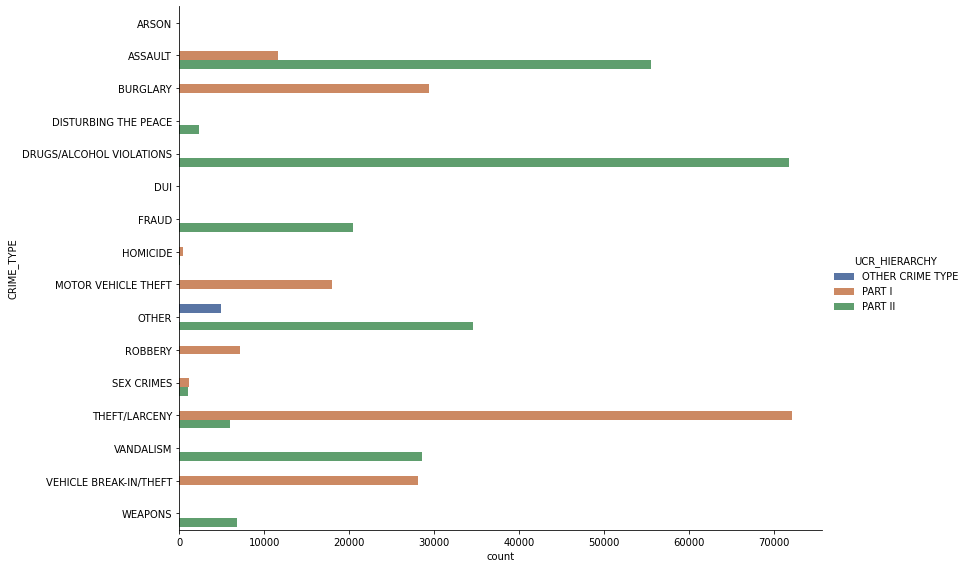

In [33]:
sns.catplot(data=df, y="CRIME_TYPE", hue="UCR_HIERARCHY", kind='count', palette="deep", height=8, aspect=12/8)

In [34]:
df_without_other = df[df.CRIME_TYPE != "OTHER"]
df_without_unknown = df[df.ATT_COMP != "UNKNOWN"]

In [35]:
crime_ucr_crosstab = pd.crosstab(df_without_other['CRIME_TYPE'], df_without_other['UCR_HIERARCHY'])
crime_ucr_crosstab

UCR_HIERARCHY,PART I,PART II
CRIME_TYPE,,
ARSON,0,36
ASSAULT,11594,55485
BURGLARY,29466,0
DISTURBING THE PEACE,0,2335
DRUGS/ALCOHOL VIOLATIONS,0,71732
DUI,0,35
FRAUD,0,20408
HOMICIDE,425,50
MOTOR VEHICLE THEFT,18015,0


In [36]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(crime_ucr_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
297645.6489137392 0.0


# Crime Type Vs. ATT COMP

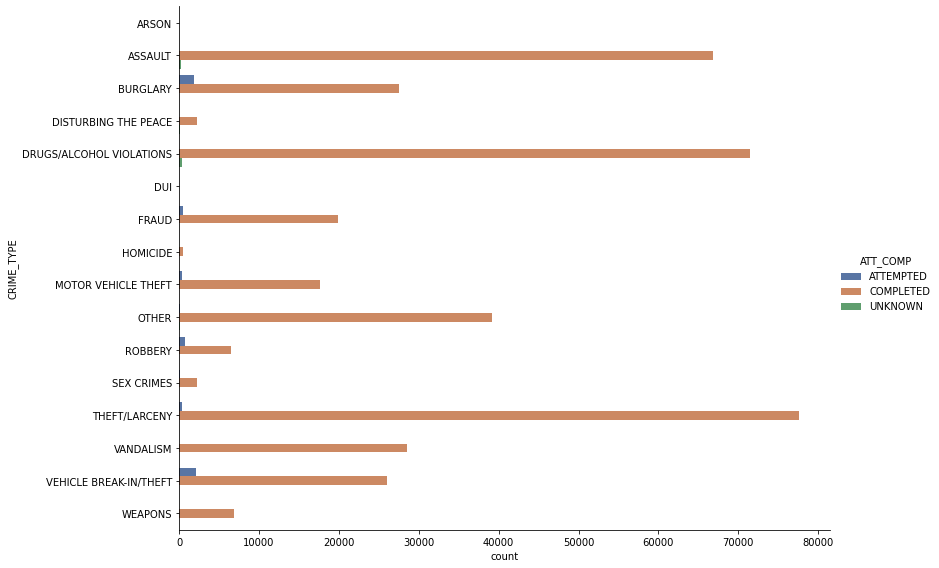

In [37]:
sns.catplot(data=df, y="CRIME_TYPE", hue="ATT_COMP", kind='count', palette="deep", height=8, aspect=12/8)

# Crime Type Vs. LMPD Division

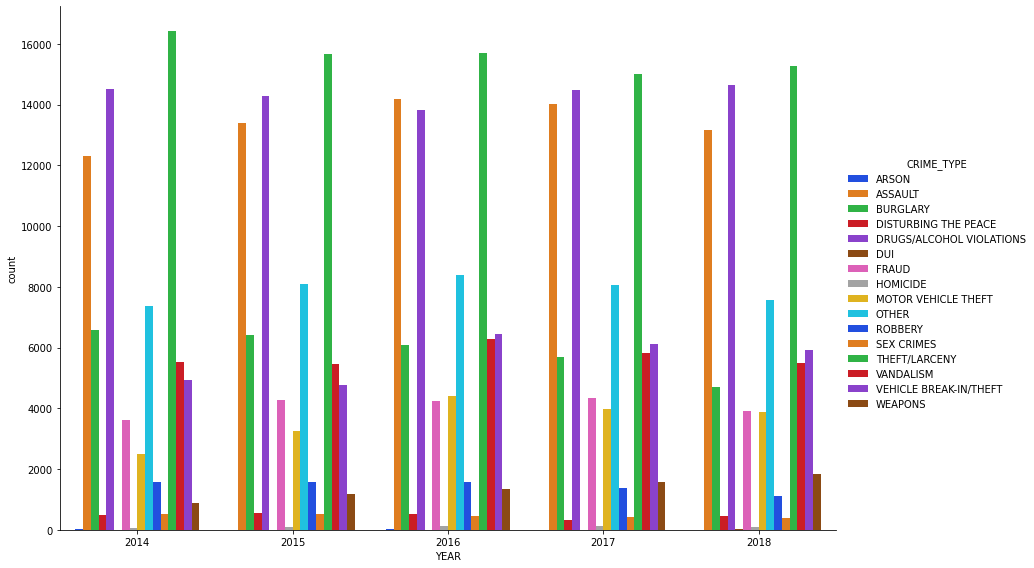

In [38]:
sns.catplot(data=df, x="YEAR", hue="CRIME_TYPE", kind='count', palette="bright", height=8, aspect=12/8)

In [39]:
crime_year_crosstab = pd.crosstab(df['CRIME_TYPE'], df['YEAR'])
crime_year_crosstab

YEAR,2014,2015,2016,2017,2018
CRIME_TYPE,,,,,
ARSON,13,4,11,5,3
ASSAULT,12310,13390,14181,14024,13174
BURGLARY,6568,6404,6090,5703,4701
DISTURBING THE PEACE,473,551,534,336,441
DRUGS/ALCOHOL VIOLATIONS,14529,14275,13809,14478,14641
DUI,9,3,5,5,13
FRAUD,3628,4286,4254,4342,3898
HOMICIDE,66,88,115,114,92
MOTOR VEHICLE THEFT,2509,3245,4416,3976,3869


In [40]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(crime_year_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
2257.076294657949 0.0


# Crime Type Vs. Month

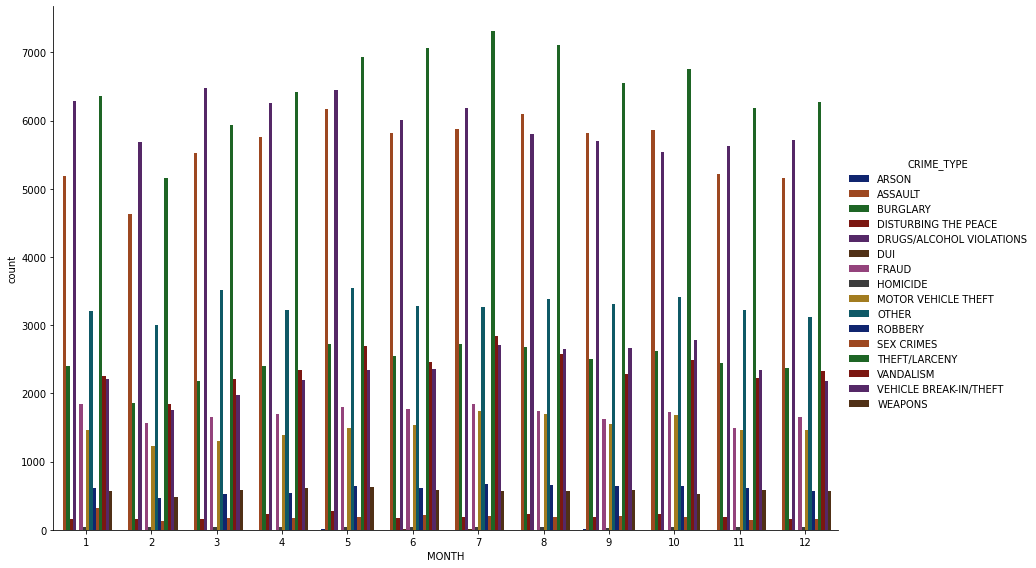

In [41]:
sns.catplot(data=df, x="MONTH", hue="CRIME_TYPE", kind='count', palette="dark", height=8, aspect=12/8)

In [42]:
crime_month_crosstab = pd.crosstab(df['CRIME_TYPE'], df['MONTH'])
crime_month_crosstab

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
CRIME_TYPE,,,,,,,,,,,,
ARSON,4,3,2,2,5,4,2,2,6,2,1,3
ASSAULT,5182,4627,5518,5761,6167,5823,5873,6093,5812,5857,5211,5155
BURGLARY,2402,1866,2183,2395,2725,2552,2721,2682,2503,2627,2445,2365
DISTURBING THE PEACE,159,159,153,235,271,171,192,233,186,232,183,161
DRUGS/ALCOHOL VIOLATIONS,6287,5688,6478,6257,6449,6006,6180,5801,5696,5539,5631,5720
DUI,4,1,4,2,4,5,6,1,1,4,1,2
FRAUD,1840,1563,1657,1693,1799,1770,1848,1747,1618,1728,1489,1656
HOMICIDE,34,44,40,38,40,41,40,39,33,42,47,37
MOTOR VEHICLE THEFT,1456,1227,1297,1389,1497,1542,1741,1700,1553,1685,1458,1470


In [43]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(crime_month_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
1276.4621167659955 5.824195754111916e-171


# Crime Type Vs. Day Range

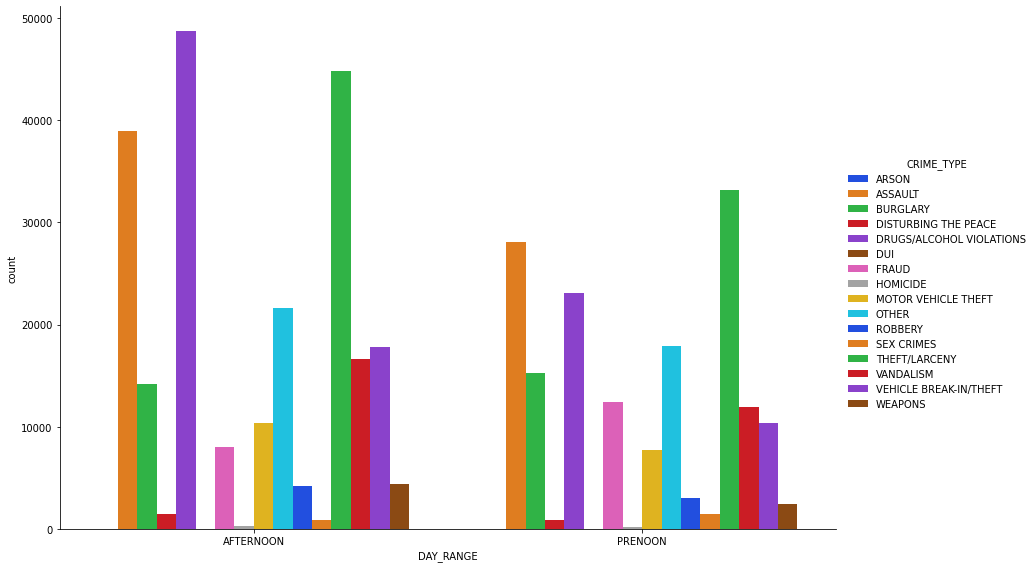

In [44]:
sns.catplot(data=df, x="DAY_RANGE", hue="CRIME_TYPE", kind='count', palette="bright", height=8, aspect=12/8)

In [45]:
crime_day_crosstab = pd.crosstab(df['CRIME_TYPE'], df['DAY_RANGE'])
crime_day_crosstab

DAY_RANGE,AFTERNOON,PRENOON
CRIME_TYPE,,
ARSON,12,24
ASSAULT,38976,28103
BURGLARY,14221,15245
DISTURBING THE PEACE,1447,888
DRUGS/ALCOHOL VIOLATIONS,48695,23037
DUI,16,19
FRAUD,8004,12404
HOMICIDE,297,178
MOTOR VEHICLE THEFT,10336,7679


In [46]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(crime_day_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
8011.017771176446 0.0


# UCR_HIERARCHY Vs. ATT Comp

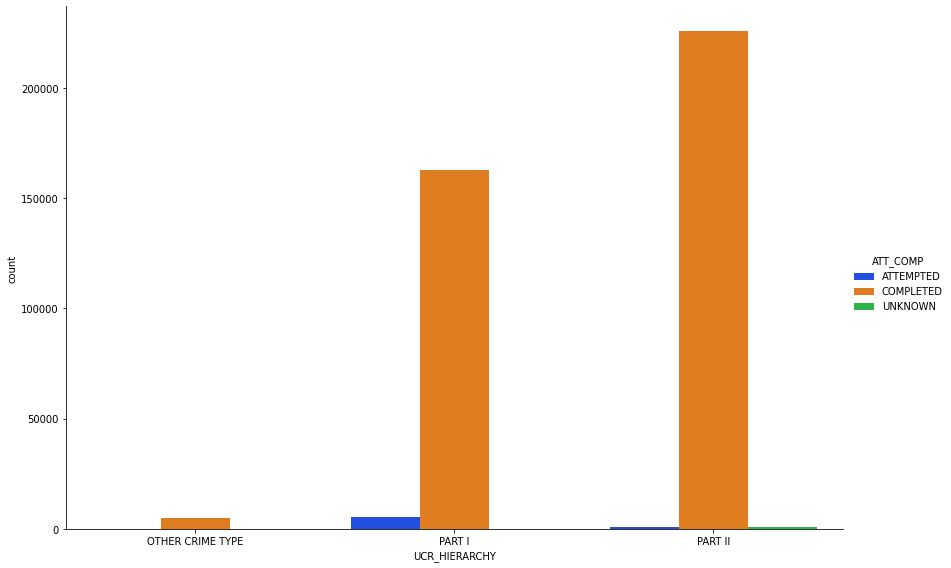

In [47]:
sns.catplot(data=df, x="UCR_HIERARCHY", hue="ATT_COMP", kind='count', palette="bright", height=8, aspect=12/8)

# UCR_HIERARCHY Vs. LMPD Division

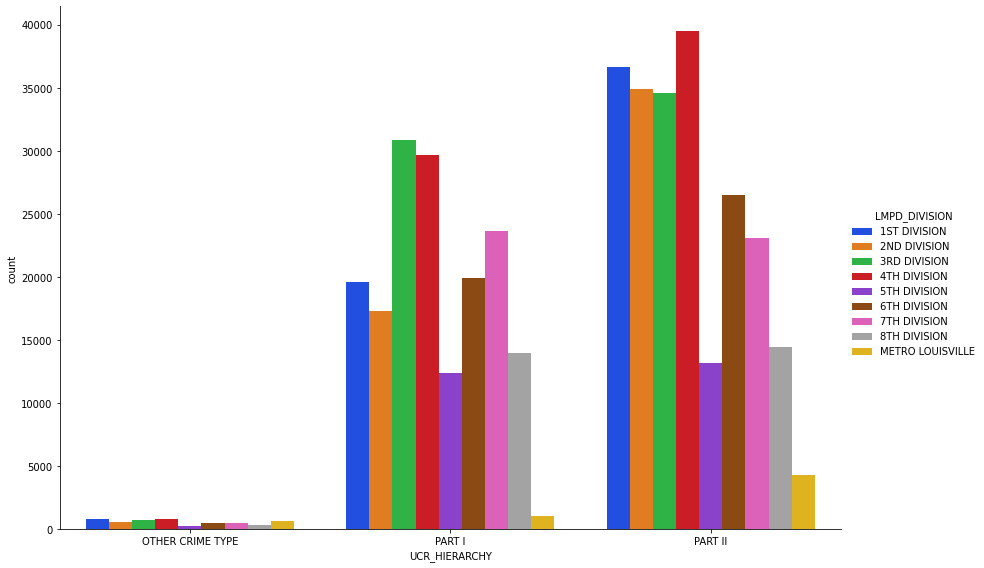

In [48]:
sns.catplot(data=df, x="UCR_HIERARCHY", hue="LMPD_DIVISION", kind='count', palette="bright", height=8, aspect=12/8)

In [49]:
ucr_lmdp_crosstab = pd.crosstab(df_without_other['LMPD_DIVISION'], df_without_other['UCR_HIERARCHY'])
ucr_lmdp_crosstab

UCR_HIERARCHY,PART I,PART II
LMPD_DIVISION,,
1ST DIVISION,19560,32433
2ND DIVISION,17260,30412
3RD DIVISION,30837,29371
4TH DIVISION,29694,34588
5TH DIVISION,12334,11106
6TH DIVISION,19898,21007
7TH DIVISION,23615,18768
8TH DIVISION,13923,11283
METRO LOUISVILLE,1059,3515


In [50]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ucr_lmdp_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
7866.013505060836 0.0


# UCR Vs. YEAR

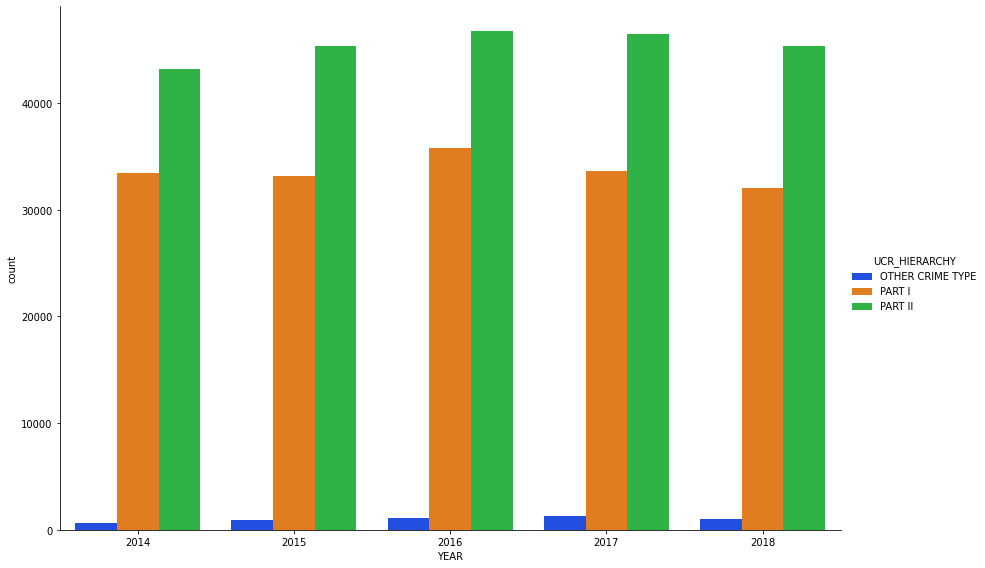

In [51]:
sns.catplot(data=df, x="YEAR", hue="UCR_HIERARCHY", kind='count', palette="bright", height=8, aspect=12/8)

In [52]:
ucr_year_crosstab = pd.crosstab(df_without_other['UCR_HIERARCHY'], df_without_other['YEAR'])
ucr_year_crosstab

YEAR,2014,2015,2016,2017,2018
UCR_HIERARCHY,,,,,
PART I,33481,33199,35816,33662,32022
PART II,36447,38179,39392,39642,38823


In [53]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ucr_year_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)
#expected

dependent (reject H0)
147.03680841821952 8.782664232430322e-31


# UCR Vs. Month

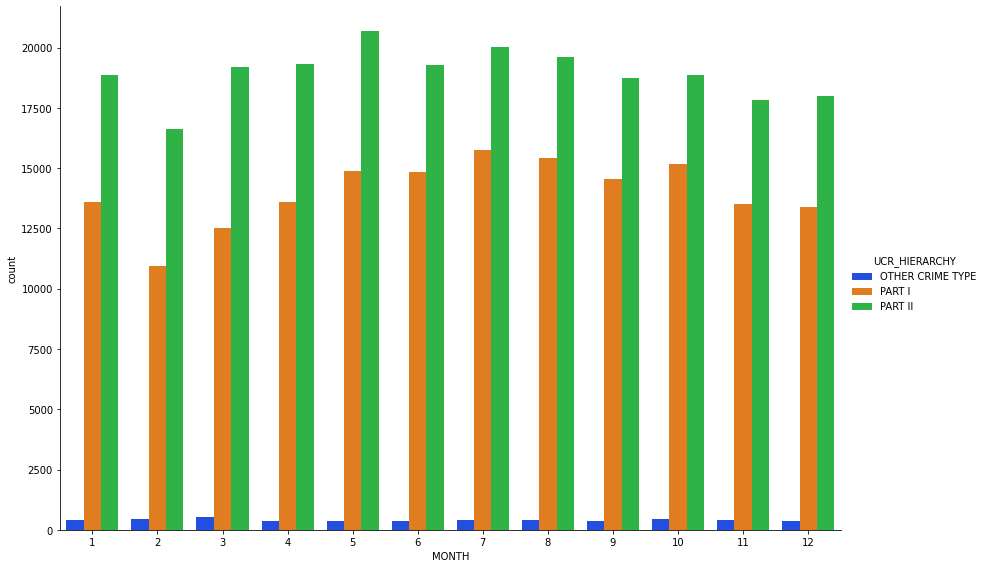

In [54]:
sns.catplot(data=df, x="MONTH", hue="UCR_HIERARCHY", kind='count', palette="bright", height=8, aspect=12/8)

In [55]:
ucr_month_crosstab = pd.crosstab(df_without_other['UCR_HIERARCHY'], df_without_other['MONTH'])
ucr_month_crosstab

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
UCR_HIERARCHY,,,,,,,,,,,,
PART I,13613,10927,12531,13578,14892,14848,15747,15409,14541,15170,13519,13405
PART II,16085,14077,16204,16466,17498,16358,17154,16637,15795,15926,15044,15239


In [56]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ucr_month_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
372.7869610826092 3.6222346144035186e-73


# UCR_HIERARCHY Vs. Day Range

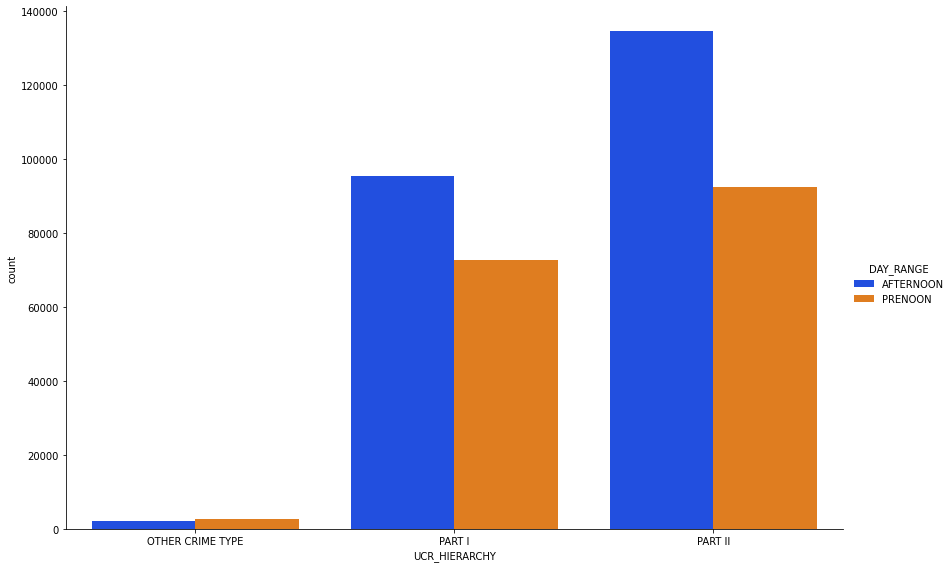

In [57]:
sns.catplot(data=df, x="UCR_HIERARCHY", hue="DAY_RANGE", kind='count', palette="bright", height=8, aspect=12/8)

In [58]:
ucr_day_crosstab = pd.crosstab(df_without_other['UCR_HIERARCHY'], df_without_other['DAY_RANGE'])
ucr_day_crosstab

DAY_RANGE,AFTERNOON,PRENOON
UCR_HIERARCHY,,
PART I,95431,72749
PART II,115313,77170


In [59]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ucr_day_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
369.9899213122879 1.8809989294881443e-82


# ATT COMP Vs. LMPD Division

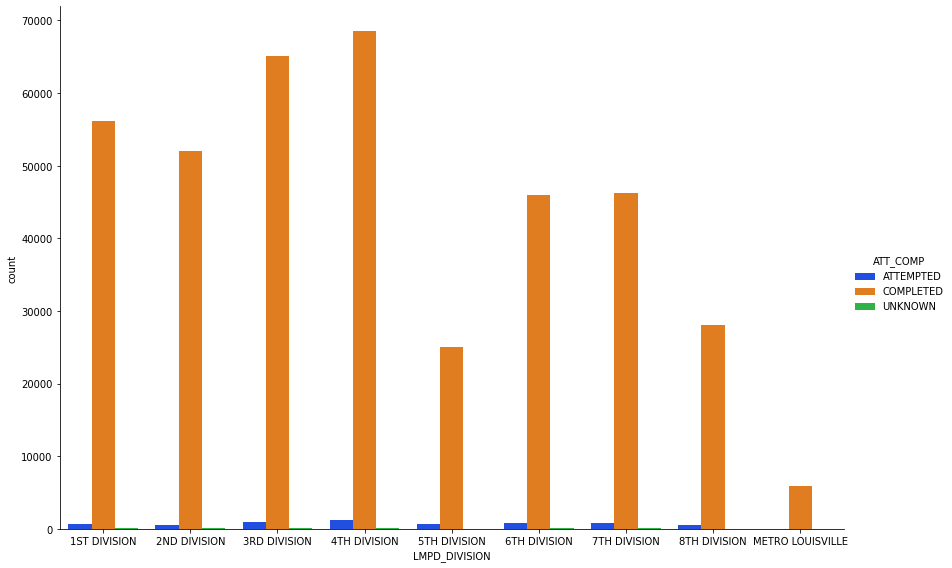

In [60]:
sns.catplot(data=df, x="LMPD_DIVISION", hue="ATT_COMP", kind='count', palette="bright", height=8, aspect=12/8)

In [61]:
att_lmpd_crosstab = pd.crosstab(df_without_unknown['LMPD_DIVISION'], df_without_unknown['ATT_COMP'])
att_lmpd_crosstab

ATT_COMP,ATTEMPTED,COMPLETED
LMPD_DIVISION,,
1ST DIVISION,649,56215
2ND DIVISION,561,51997
3RD DIVISION,930,65108
4TH DIVISION,1290,68511
5TH DIVISION,663,24997
6TH DIVISION,783,45984
7TH DIVISION,857,46185
8TH DIVISION,507,28102
METRO LOUISVILLE,45,5905


In [62]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(att_lmpd_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
424.83014992731097 9.096153785326488e-87


# ATT COMP Vs. Year

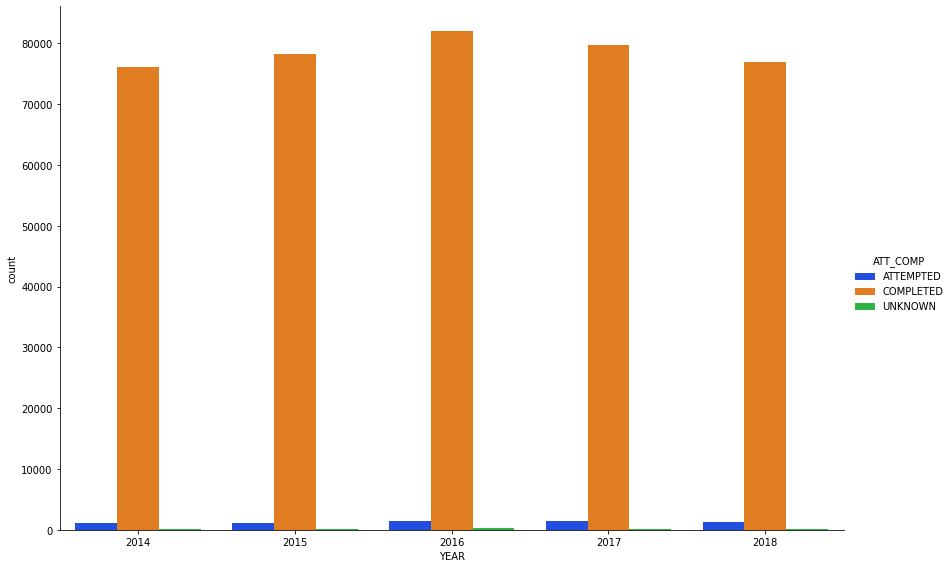

In [63]:
sns.catplot(data=df, x="YEAR", hue="ATT_COMP", kind='count', palette="bright", height=8, aspect=12/8)

In [64]:
att_year_crosstab = pd.crosstab(df_without_unknown['YEAR'], df_without_unknown['ATT_COMP'])
att_year_crosstab

ATT_COMP,ATTEMPTED,COMPLETED
YEAR,,
2014,1062,76122
2015,1069,78321
2016,1368,81975
2017,1461,79693
2018,1325,76893


In [65]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(att_year_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
82.59597195069095 4.907183135053134e-17


# ATT COMP Vs. Month

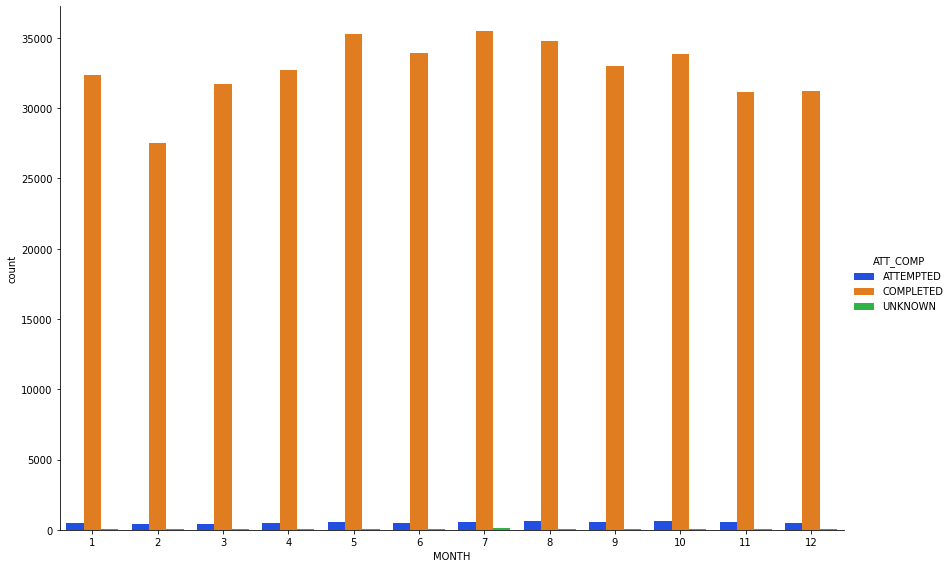

In [66]:
sns.catplot(data=df, x="MONTH", hue="ATT_COMP", kind='count', palette="bright", height=8, aspect=12/8)

In [67]:
att_month_crosstab = pd.crosstab(df_without_unknown['MONTH'], df_without_unknown['ATT_COMP'])
att_month_crosstab

ATT_COMP,ATTEMPTED,COMPLETED
MONTH,,
1,509,32346
2,424,27519
3,432,31745
4,473,32711
5,551,35301
6,511,33901
7,582,35471
8,604,34757
9,562,33019


In [68]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(att_month_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
36.815225011228215 0.0001237401779445361


# Year Vs. Month

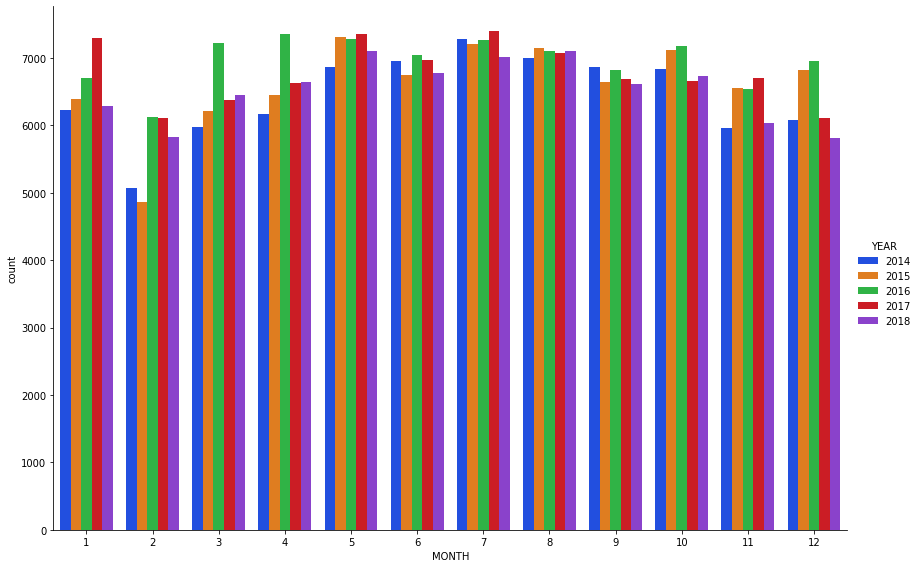

In [69]:
sns.catplot(data=df, x="MONTH", hue="YEAR", kind='count', palette="bright", height=8, aspect=12/8)

In [70]:
year_month_crosstab = pd.crosstab(df['MONTH'], df['YEAR'])
year_month_crosstab

YEAR,2014,2015,2016,2017,2018
MONTH,,,,,
1,6222,6389,6709,7291,6294
2,5073,4871,6121,6115,5825
3,5983,6212,7229,6377,6449
4,6167,6457,7361,6631,6646
5,6861,7319,7285,7357,7107
6,6954,6745,7039,6976,6777
7,7289,7202,7261,7396,7021
8,7001,7155,7100,7068,7103
9,6874,6646,6824,6686,6617


In [71]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(year_month_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
622.5246568960512 3.1479705610540787e-103


# YEAR Vs. Day Range

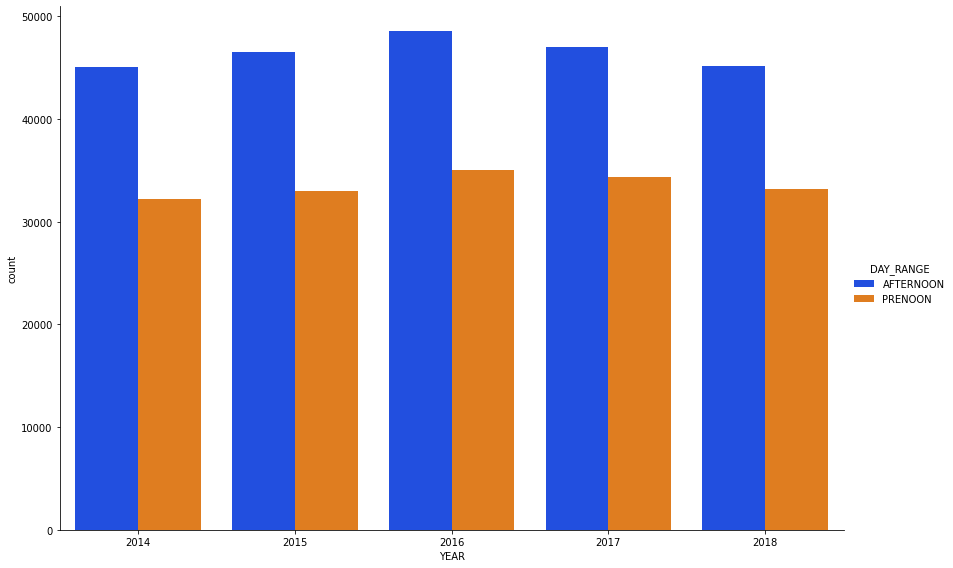

In [72]:
sns.catplot(data=df, x="YEAR", hue="DAY_RANGE", kind='count', palette="bright", height=8, aspect=12/8)

In [73]:
year_day_crosstab = pd.crosstab(df['DAY_RANGE'], df['YEAR'])
year_day_crosstab

YEAR,2014,2015,2016,2017,2018
DAY_RANGE,,,,,
AFTERNOON,45051,46539,48540,47023,45175
PRENOON,32251,32948,35060,34331,33233


In [74]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(year_day_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
17.955843955104957 0.0012588620165390706


# Month Vs. Day Range

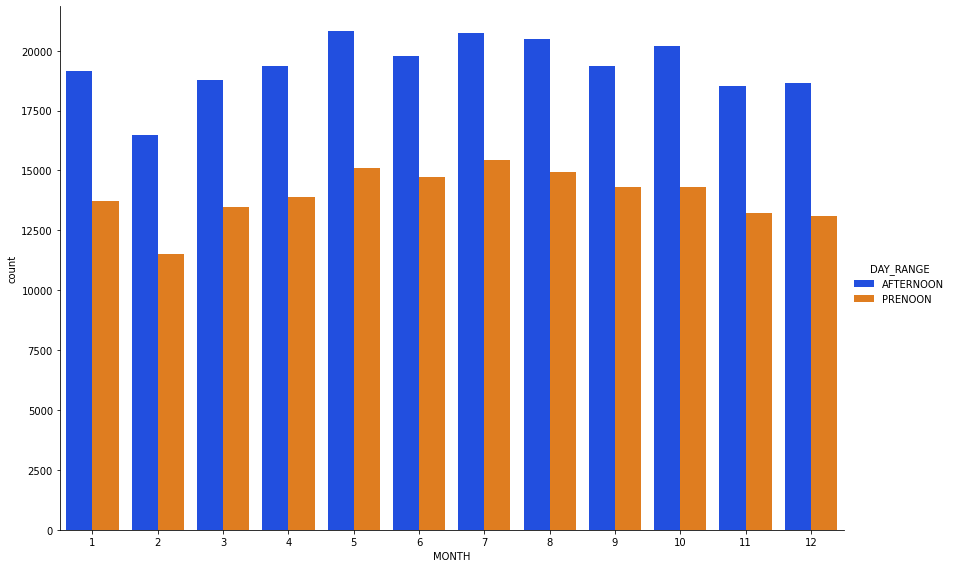

In [75]:
sns.catplot(data=df, x="MONTH", hue="DAY_RANGE", kind='count', palette="bright", height=8, aspect=12/8)

In [76]:
month_day_crosstab = pd.crosstab(df['DAY_RANGE'], df['MONTH'])
month_day_crosstab

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
DAY_RANGE,,,,,,,,,,,,
AFTERNOON,19159,16472,18793,19350,20809,19784,20726,20485,19350,20206,18541,18653
PRENOON,13746,11533,13457,13912,15120,14707,15443,14942,14297,14305,13243,13118


In [77]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(month_day_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
38.42598172678264 6.628429335386333e-05


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400151 entries, 0 to 403685
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   UOR_DESC           400151 non-null  string  
 1   CRIME_TYPE         400151 non-null  category
 2   UCR_HIERARCHY      400151 non-null  category
 3   ATT_COMP           400151 non-null  category
 4   LMPD_DIVISION      400151 non-null  category
 5   PREMISE_TYPE       400151 non-null  string  
 6   BLOCK_ADDRESS      400151 non-null  string  
 7   CITY               400151 non-null  string  
 8   ZIP_CODE           400151 non-null  Int64   
 9   DIFF_TIME_MIN      400151 non-null  Int64   
 10  YEAR               400151 non-null  category
 11  MONTH              400151 non-null  category
 12  DAY_RANGE          400151 non-null  category
 13  DIFF_TIME_MIN_LOG  279581 non-null  Float64 
dtypes: Float64(1), Int64(2), category(7), string(4)
memory usage: 36.3 MB


# TOP UOR_DESC Analysis

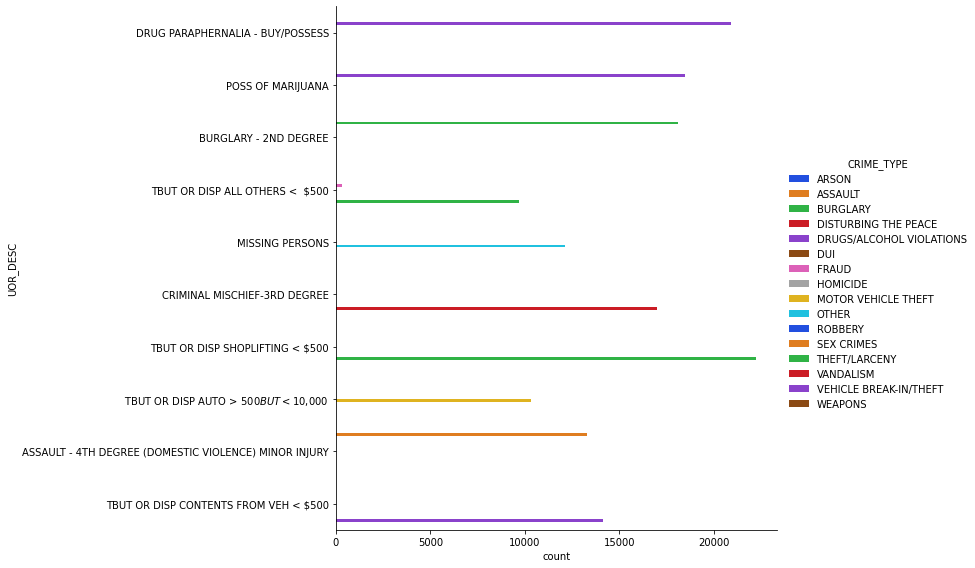

In [79]:
sns.catplot(data=df[df.UOR_DESC.isin(top_uor)], y="UOR_DESC", hue="CRIME_TYPE", kind='count', palette="bright", height=8, aspect=12/8)
# have same information as crime type so couldn't be useful in analysis

# Top Block Adresses Analysis

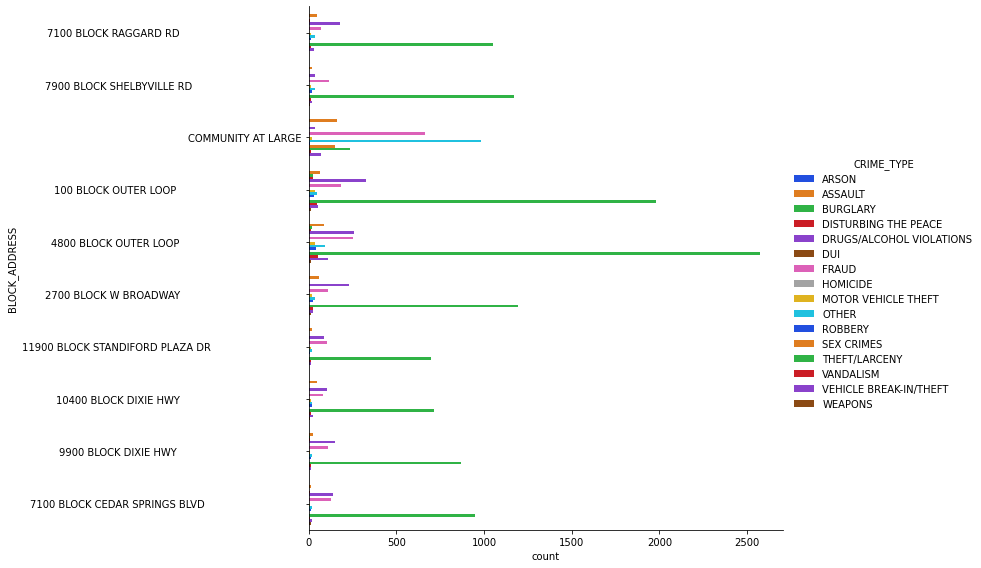

In [80]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="CRIME_TYPE", kind='count', palette="bright", height=8, aspect=12/8)

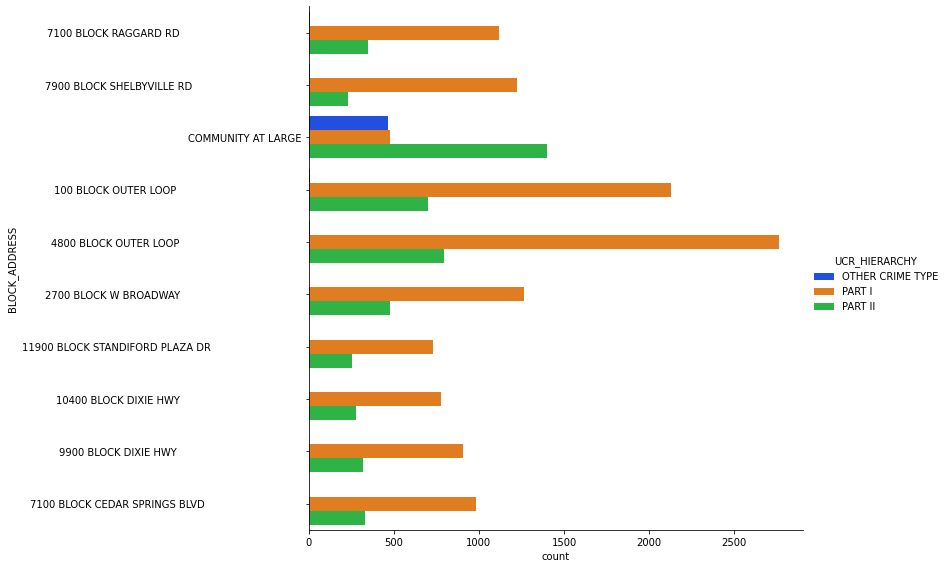

In [81]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="UCR_HIERARCHY", kind='count', palette="bright", height=8, aspect=12/8)

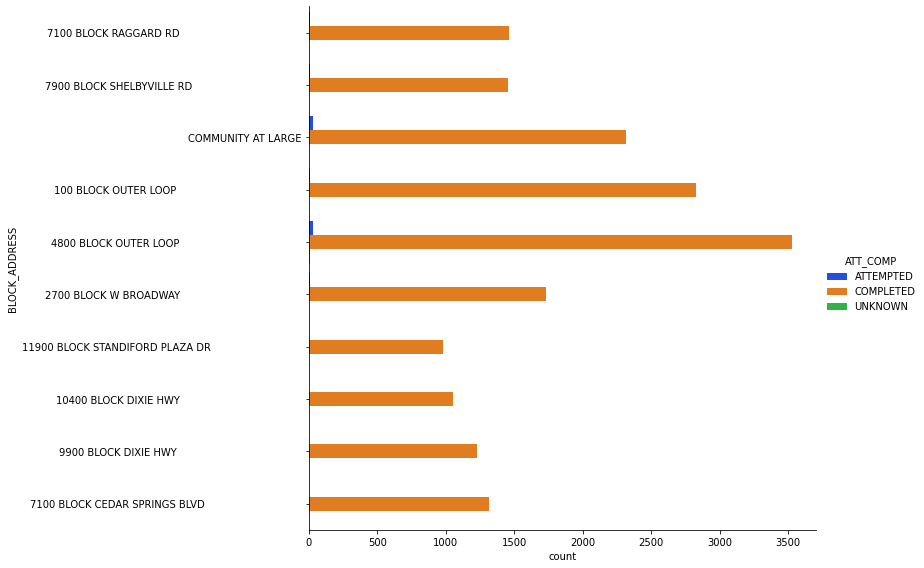

In [82]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="ATT_COMP", kind='count', palette="bright", height=8, aspect=12/8)

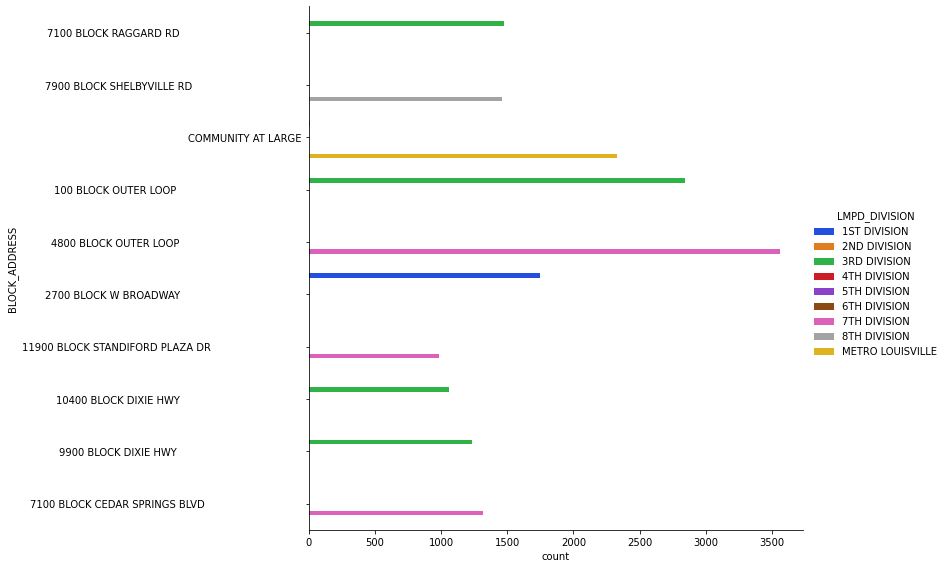

In [83]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="LMPD_DIVISION", kind='count', palette="bright", height=8, aspect=12/8)

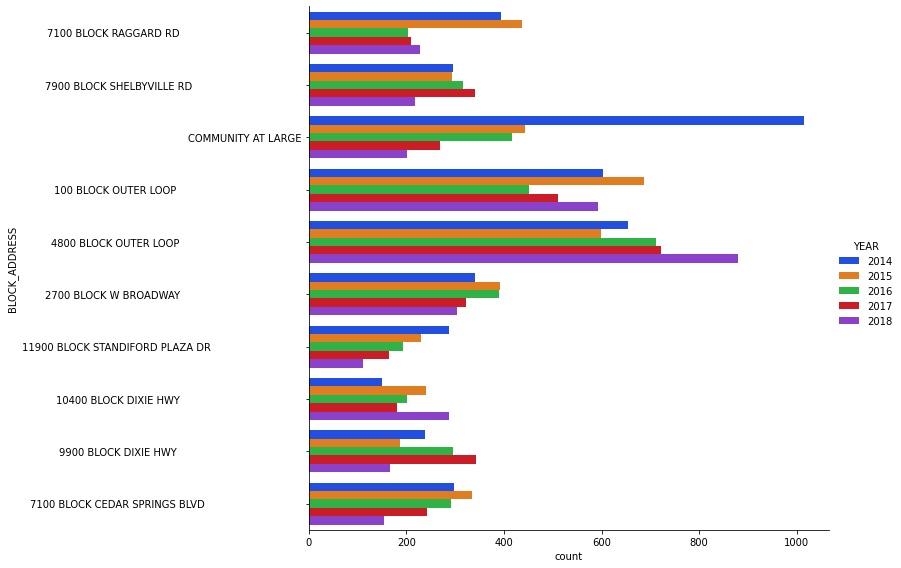

In [84]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="YEAR", kind='count', palette="bright", height=8, aspect=12/8)

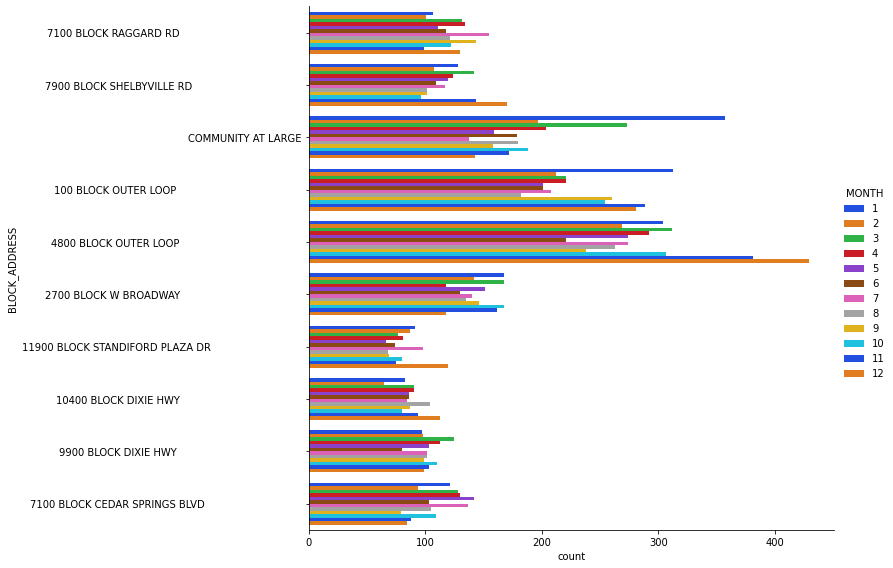

In [85]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="MONTH", kind='count', palette="bright", height=8, aspect=12/8)

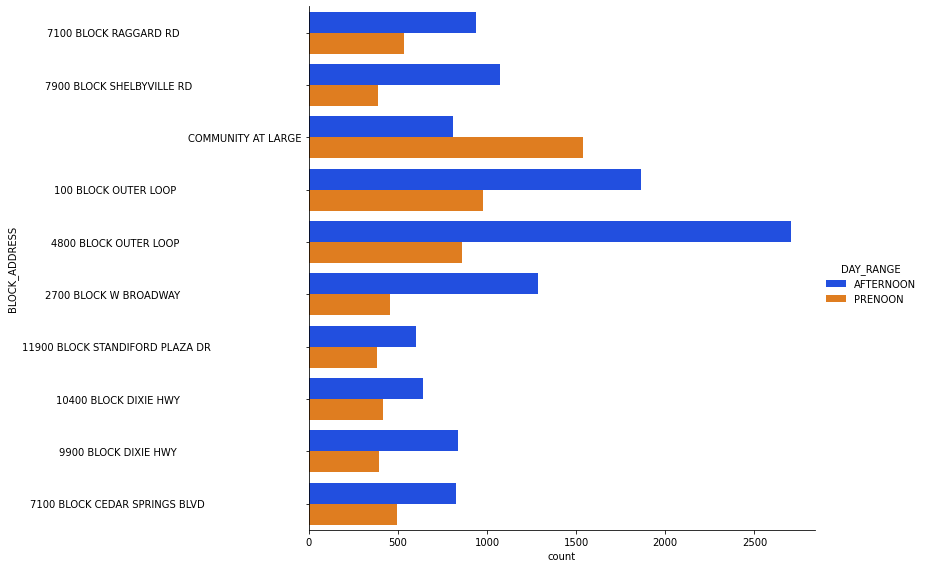

In [86]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="DAY_RANGE", kind='count', palette="bright", height=8, aspect=12/8)

# Top Primise Analysis

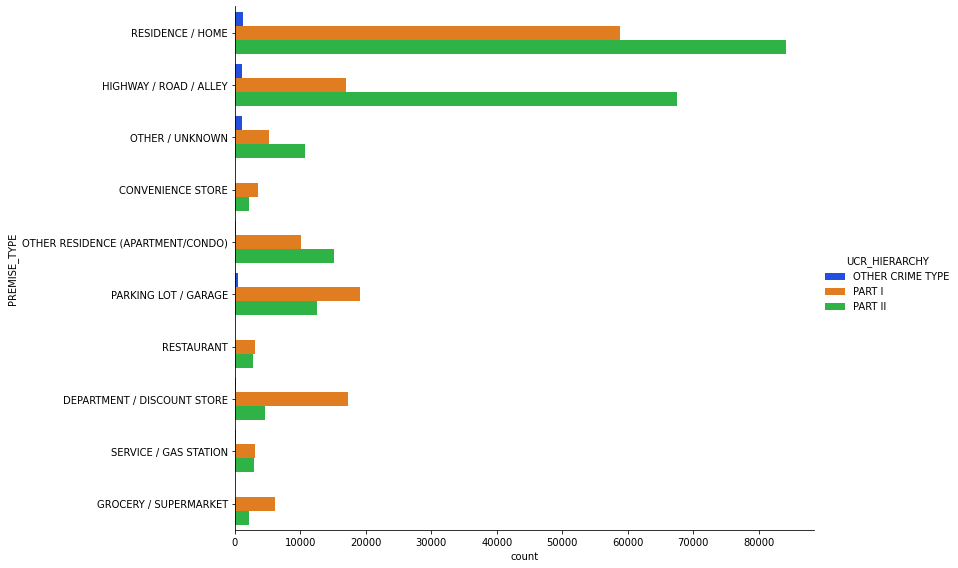

In [87]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], y="PREMISE_TYPE", hue="UCR_HIERARCHY", kind='count', palette="bright", height=8, aspect=12/8)

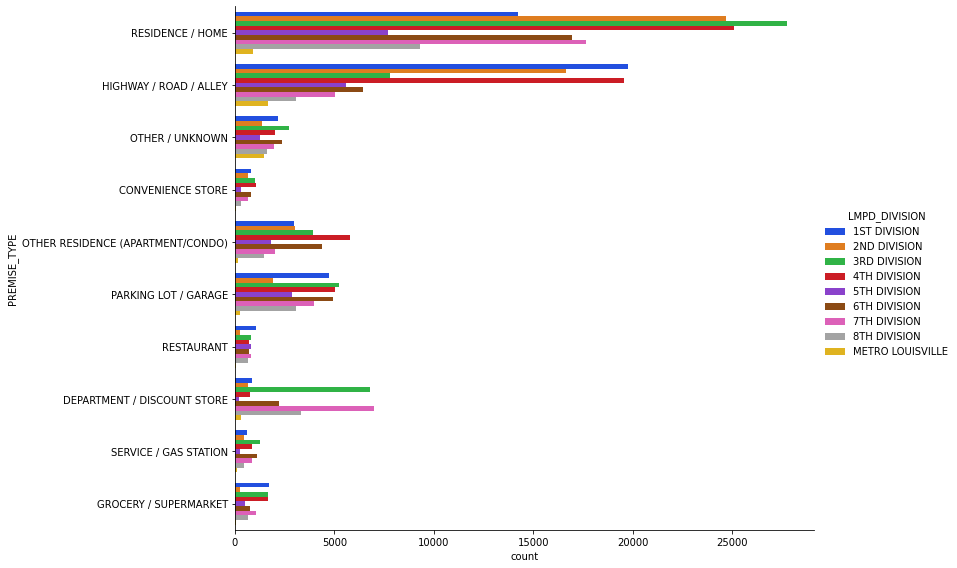

In [88]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], y="PREMISE_TYPE", hue="LMPD_DIVISION", kind='count', palette="bright", height=8, aspect=12/8)

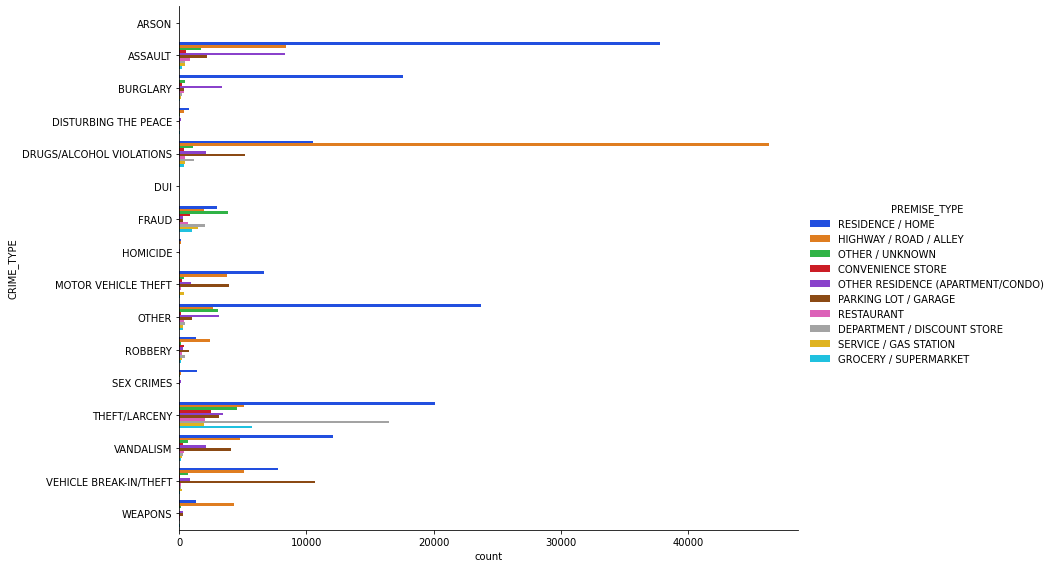

In [89]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], y="CRIME_TYPE", hue="PREMISE_TYPE", kind='count', palette="bright", height=8, aspect=12/8)

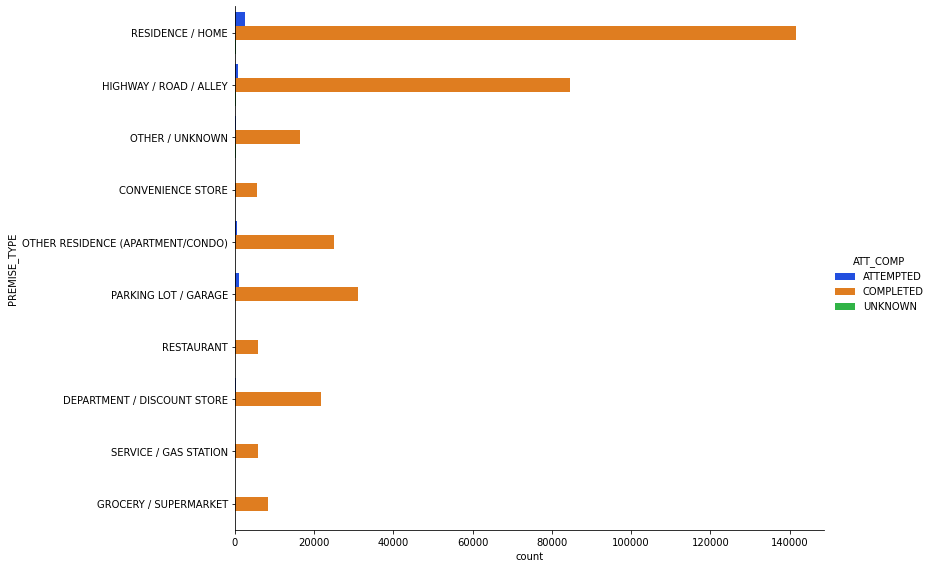

In [90]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], y="PREMISE_TYPE", hue="ATT_COMP", kind='count', palette="bright", height=8, aspect=12/8)

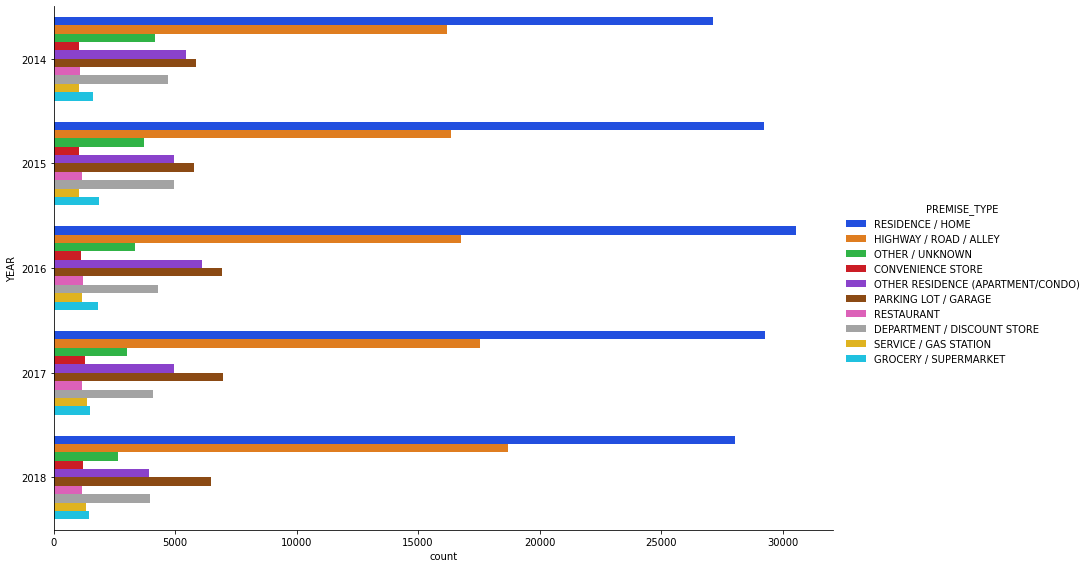

In [91]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], y="YEAR", hue="PREMISE_TYPE", kind='count', palette="bright", height=8, aspect=12/8)

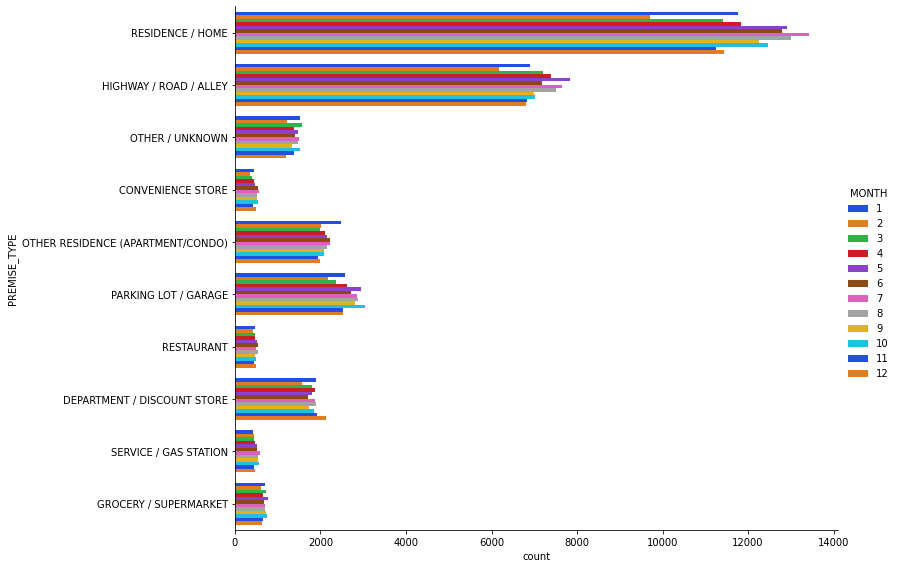

In [92]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], y="PREMISE_TYPE", hue="MONTH", kind='count', palette="bright", height=8, aspect=12/8)

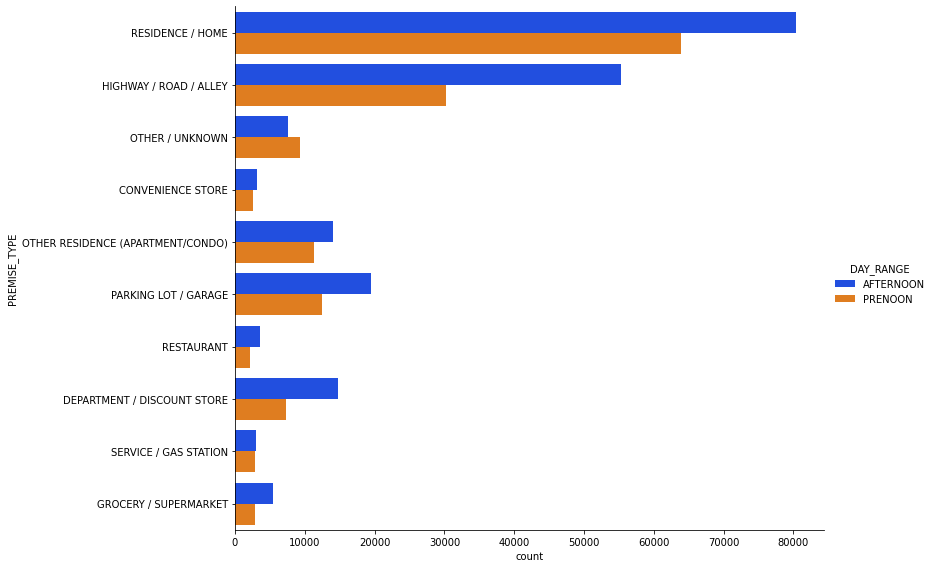

In [93]:
sns.catplot(data=df[df.PREMISE_TYPE.isin(top_premise)], y="PREMISE_TYPE", hue="DAY_RANGE", kind='count', palette="bright", height=8, aspect=12/8)

# Diff Time Analysis

In [94]:
df_without_na_diff_time = df[~df.DIFF_TIME_MIN_LOG.isna()]

<AxesSubplot:>

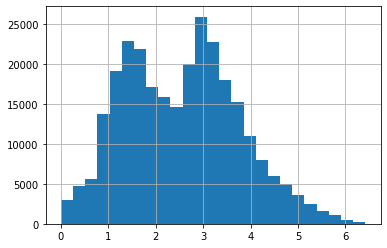

In [95]:
df_without_na_diff_time.DIFF_TIME_MIN_LOG.hist(bins=25)

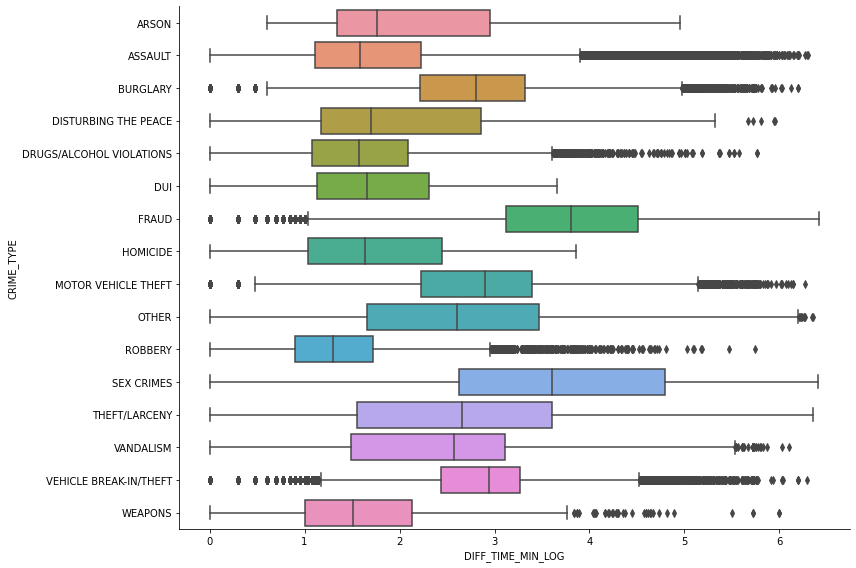

In [96]:
sns.catplot(data=df_without_na_diff_time, y="CRIME_TYPE", x="DIFF_TIME_MIN_LOG", kind="box", height=8, aspect=12/8)

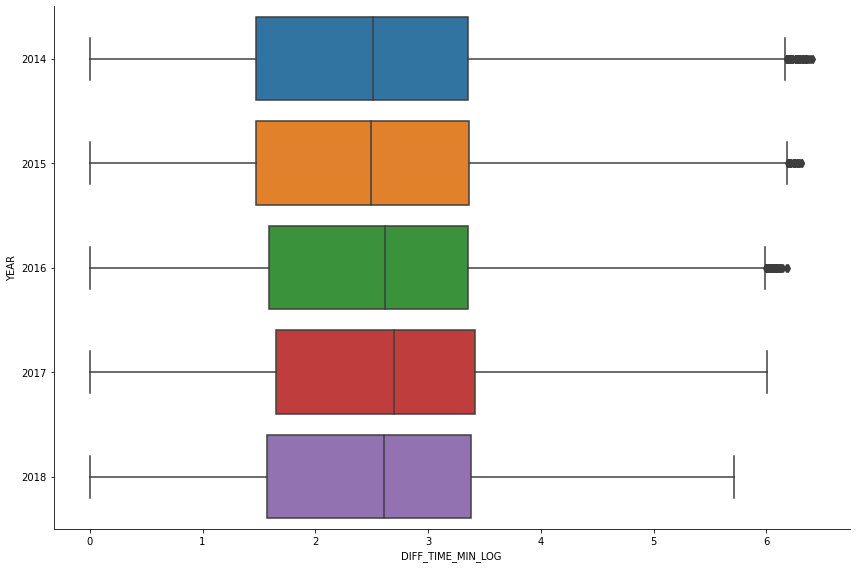

In [97]:
sns.catplot(data=df_without_na_diff_time, y="YEAR", x="DIFF_TIME_MIN_LOG", kind="box", height=8, aspect=12/8)

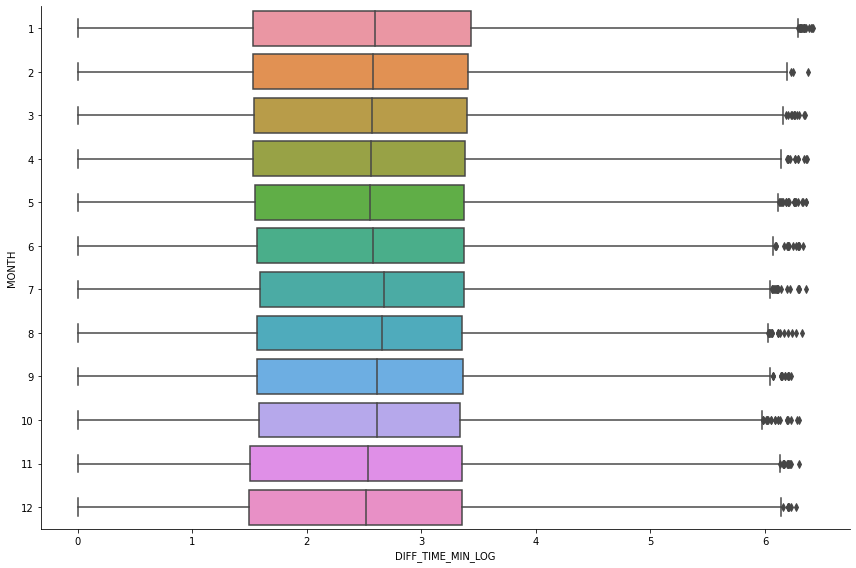

In [98]:
sns.catplot(data=df_without_na_diff_time, y="MONTH", x="DIFF_TIME_MIN_LOG", kind="box", height=8, aspect=12/8)

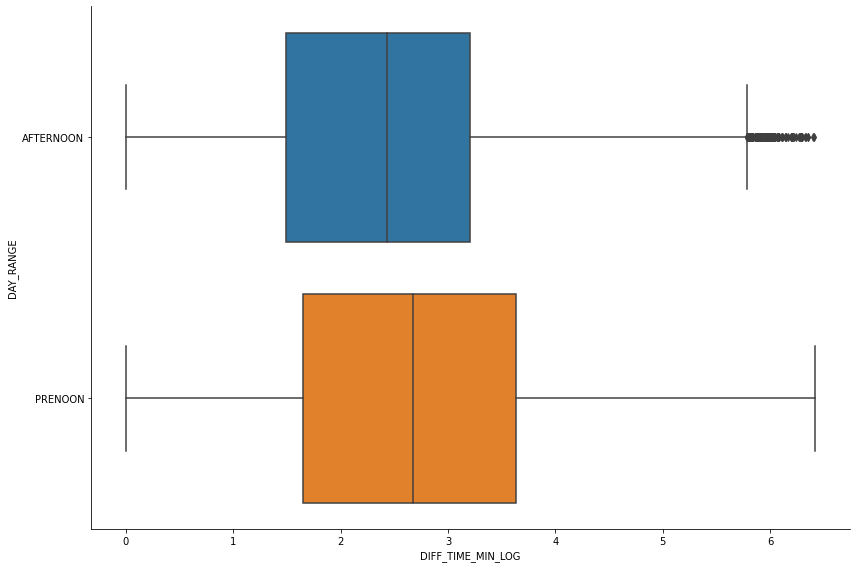

In [99]:
sns.catplot(data=df_without_na_diff_time, y="DAY_RANGE", x="DIFF_TIME_MIN_LOG", kind="box", height=8, aspect=12/8)

# ZIP CODE Analysis

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400151 entries, 0 to 403685
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   UOR_DESC           400151 non-null  string  
 1   CRIME_TYPE         400151 non-null  category
 2   UCR_HIERARCHY      400151 non-null  category
 3   ATT_COMP           400151 non-null  category
 4   LMPD_DIVISION      400151 non-null  category
 5   PREMISE_TYPE       400151 non-null  string  
 6   BLOCK_ADDRESS      400151 non-null  string  
 7   CITY               400151 non-null  string  
 8   ZIP_CODE           400151 non-null  Int64   
 9   DIFF_TIME_MIN      400151 non-null  Int64   
 10  YEAR               400151 non-null  category
 11  MONTH              400151 non-null  category
 12  DAY_RANGE          400151 non-null  category
 13  DIFF_TIME_MIN_LOG  279581 non-null  Float64 
dtypes: Float64(1), Int64(2), category(7), string(4)
memory usage: 36.3 MB


<AxesSubplot:>

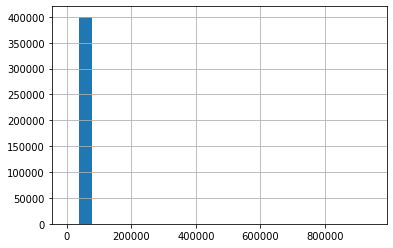

In [101]:
df.ZIP_CODE.hist(bins=25)

<AxesSubplot:>

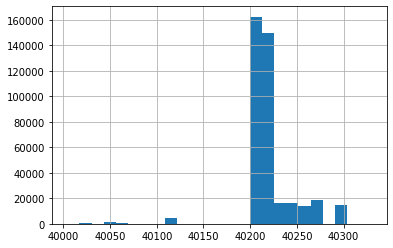

In [102]:
df[(df.ZIP_CODE < 40400) & (df.ZIP_CODE > 39000)].ZIP_CODE.hist(bins=25)

In [103]:
df["ZIP_CODE_CAT"] = pd.cut(df.ZIP_CODE, bins=[0, 40200, 40225, 40300, 1000000], labels=["< 40200", "[40200, 40225]", "[40225, 40300]", "> 40300"])

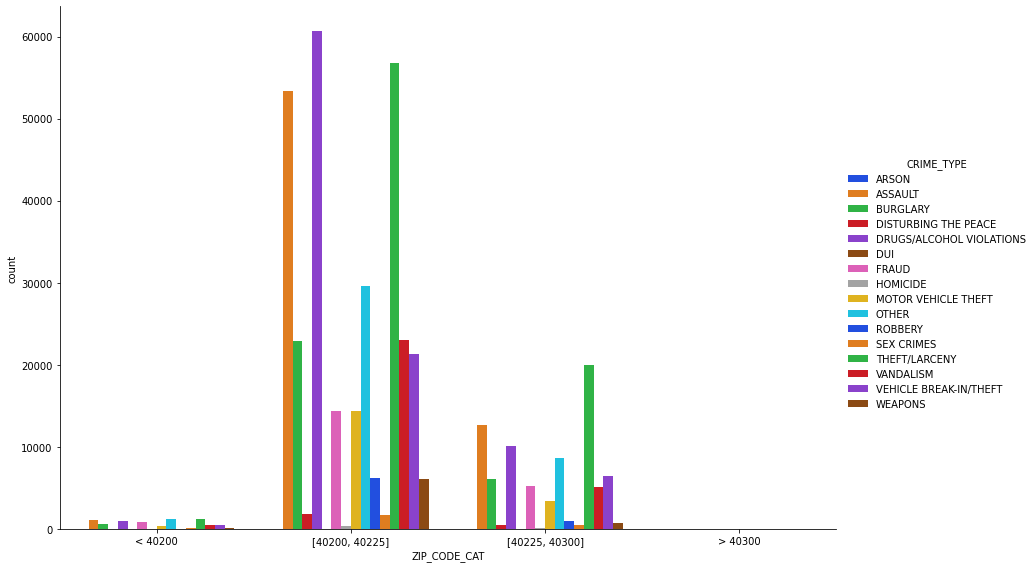

In [104]:
sns.catplot(data=df, x="ZIP_CODE_CAT", hue="CRIME_TYPE", kind='count', palette="bright", height=8, aspect=12/8)

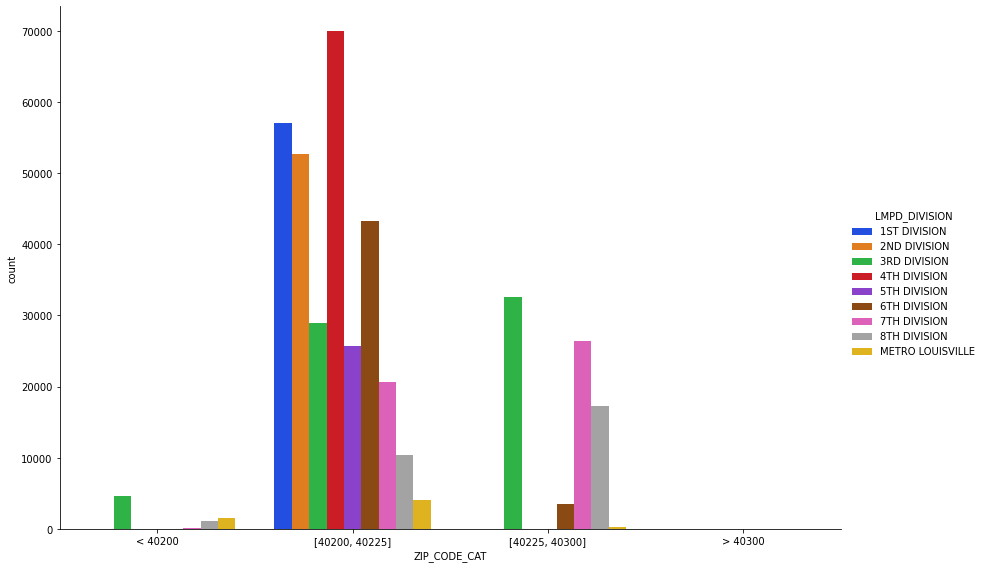

In [105]:
sns.catplot(data=df, x="ZIP_CODE_CAT", hue="LMPD_DIVISION", kind='count', palette="bright", height=8, aspect=12/8)

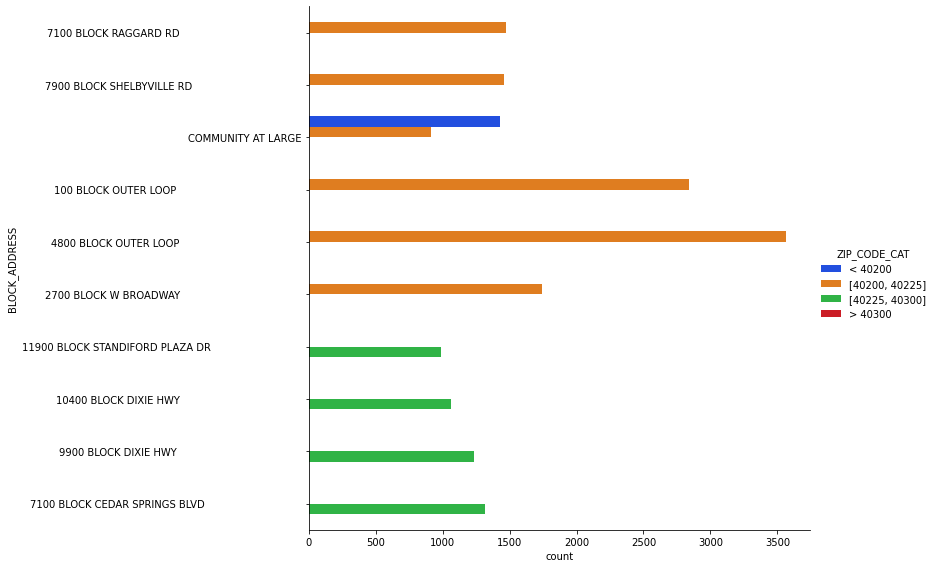

In [106]:
sns.catplot(data=df[df.BLOCK_ADDRESS.isin(top_addresses)], y="BLOCK_ADDRESS", hue="ZIP_CODE_CAT", kind='count', palette="bright", height=8, aspect=12/8)

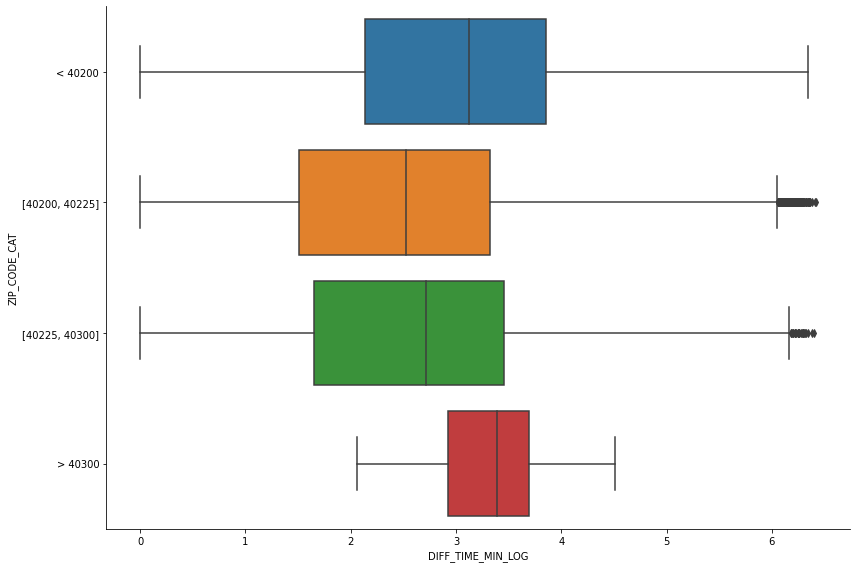

In [107]:
sns.catplot(data=df[~df.DIFF_TIME_MIN_LOG.isna()], y="ZIP_CODE_CAT", x="DIFF_TIME_MIN_LOG", kind="box", height=8, aspect=12/8)